1. Laden der Bibliotheken


In [89]:
#Laden der benötigten Bibliotheken
import math
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import pickle 
import random
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from scipy.stats import randint as sp_randint
from scipy.stats import uniform, randint, chi2_contingency
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeClassifier
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from tqdm import tnrange, tqdm_notebook
#from klassen import SimpleCNN, Perceptron, NeuralNetwork




2. Einlesen der Daten

In [4]:
#Datensatz einlesen
data = pd.read_csv('../data/stroke_data.csv')
# Datensatz heruntergeladen von Kaggle --> Stroke Prediction
# https://www.kaggle.com/datasets/prosperchuks/health-dataset?resource=download

3. Vorbereiten der Daten (Kapitel 7)

In [5]:
#Check auf Dubletten --> Keine Dubletten vorhanden. 
data.duplicated().sum()

0

In [6]:
#Überblick verschaffen über die Daten und deren Datentyp
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


In [7]:
#Check nach Nullwerten
data.isnull().sum().sort_values(ascending=False)
#Es gibt systemseitig 3 Nullwerte bei der Angabe Geschlecht

sex                  3
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
#Bereinigung der Nullwerte (NaN)
data = data.dropna()

In [9]:
data.isnull().sum().sort_values(ascending=False)
#Nun sind die Nullwerte-Zeilen aus dem Datensatz entfernt

sex                  0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
#Überblick über die Verteilung der Daten
data.describe().T
#Der Datensatz hat 40.907 Zeilen und 11 Spalten
#Auffaellig: 
# age min -9 und sehr hohe Streuung

,count,mean,std,min,25%,50%,75%,max
sex,40907.0,0.555162,0.496954,0.00,0.00,1.00,1.00,1.00
age,40907.0,51.327303,21.624171,-9.00,35.00,52.00,68.00,103.00
hypertension,40907.0,0.213851,0.410028,0.00,0.00,0.00,0.00,1.00
heart_disease,40907.0,0.127729,0.333792,0.00,0.00,0.00,0.00,1.00
ever_married,40907.0,0.821326,0.383083,0.00,1.00,1.00,1.00,1.00
work_type,40907.0,3.461095,0.780934,0.00,3.00,4.00,4.00,4.00
Residence_type,40907.0,0.514851,0.499786,0.00,0.00,1.00,1.00,1.00
avg_glucose_level,40907.0,122.079679,57.561951,55.12,78.75,97.92,167.59,271.74
bmi,40907.0,30.406488,6.835305,11.50,25.90,29.40,34.10,92.00
smoking_status,40907.0,0.488572,0.499875,0.00,0.00,0.00,1.00,1.00


In [11]:
print(data.shape)


(40907, 11)


In [12]:
#Zeilen Löschen mit negativen Altersangaben
data = data[data['age'] > 0]
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,40826.0,0.554891,0.496984,0.00,0.00,1.000,1.00,1.00
age,40826.0,51.433033,21.514646,1.00,35.00,52.000,68.00,103.00
hypertension,40826.0,0.213565,0.409828,0.00,0.00,0.000,0.00,1.00
heart_disease,40826.0,0.127639,0.333692,0.00,0.00,0.000,0.00,1.00
ever_married,40826.0,0.821266,0.383134,0.00,1.00,1.000,1.00,1.00
work_type,40826.0,3.460883,0.781131,0.00,3.00,4.000,4.00,4.00
Residence_type,40826.0,0.514697,0.499790,0.00,0.00,1.000,1.00,1.00
avg_glucose_level,40826.0,122.065061,57.552075,55.12,78.75,97.935,167.41,271.74
bmi,40826.0,30.406021,6.835524,11.50,25.90,29.400,34.10,92.00
smoking_status,40826.0,0.488782,0.499880,0.00,0.00,0.000,1.00,1.00


In [13]:
print(data.shape)

(40826, 11)


4. 

In [14]:
#Check nach Verteilung der Damen/Herren im Datensatz
#female = data.loc[data.loc[:,'sex']==0, ['sex']].count()
#male = data.loc[data.loc[:,'sex']==1,['sex']].count()
#print(f, 'Anzahl an Damen') # Frauen 
#print(data.loc[data.loc[:,'sex']==1,['sex']].count(), 'Anzahl an Herren') # Männer 

f = data[data['sex']==0]['sex'].count()
m = data[data['sex']==1]['sex'].count()
frauen_mit_schlaganfall = data[(data['sex'] == 0) & (data['stroke'] == 1)]
anzahl_frauen_mit_schlaganfall = len(frauen_mit_schlaganfall)
maenner_mit_schlaganfall = data[(data['sex'] == 1) & (data['stroke'] == 1)]
anzahl_maenner_mit_schlaganfall = len(maenner_mit_schlaganfall)

print("Anzahl an Frauen", f)
print("Anzahl an Männer", m)
anteil = f / (m+f)
print('Anteil an Frauen:', int(anteil*100), '%')
print("Frauen mit Schlaganfall",anzahl_frauen_mit_schlaganfall)
print("Männer mit Schlaganfall",anzahl_maenner_mit_schlaganfall)

Anzahl an Frauen 18172
Anzahl an Männer 22654
Anteil an Frauen: 44 %
Frauen mit Schlaganfall 10205
Männer mit Schlaganfall 10174


In [49]:
anzahl_mit_schlaganfall = (data['stroke'] == 1).sum()
print(data['stroke'].value_counts()[1])

print("Anzahl der Menschen mit Schlaganfall:", anzahl_mit_schlaganfall)


20379
Anzahl der Menschen mit Schlaganfall: 20379


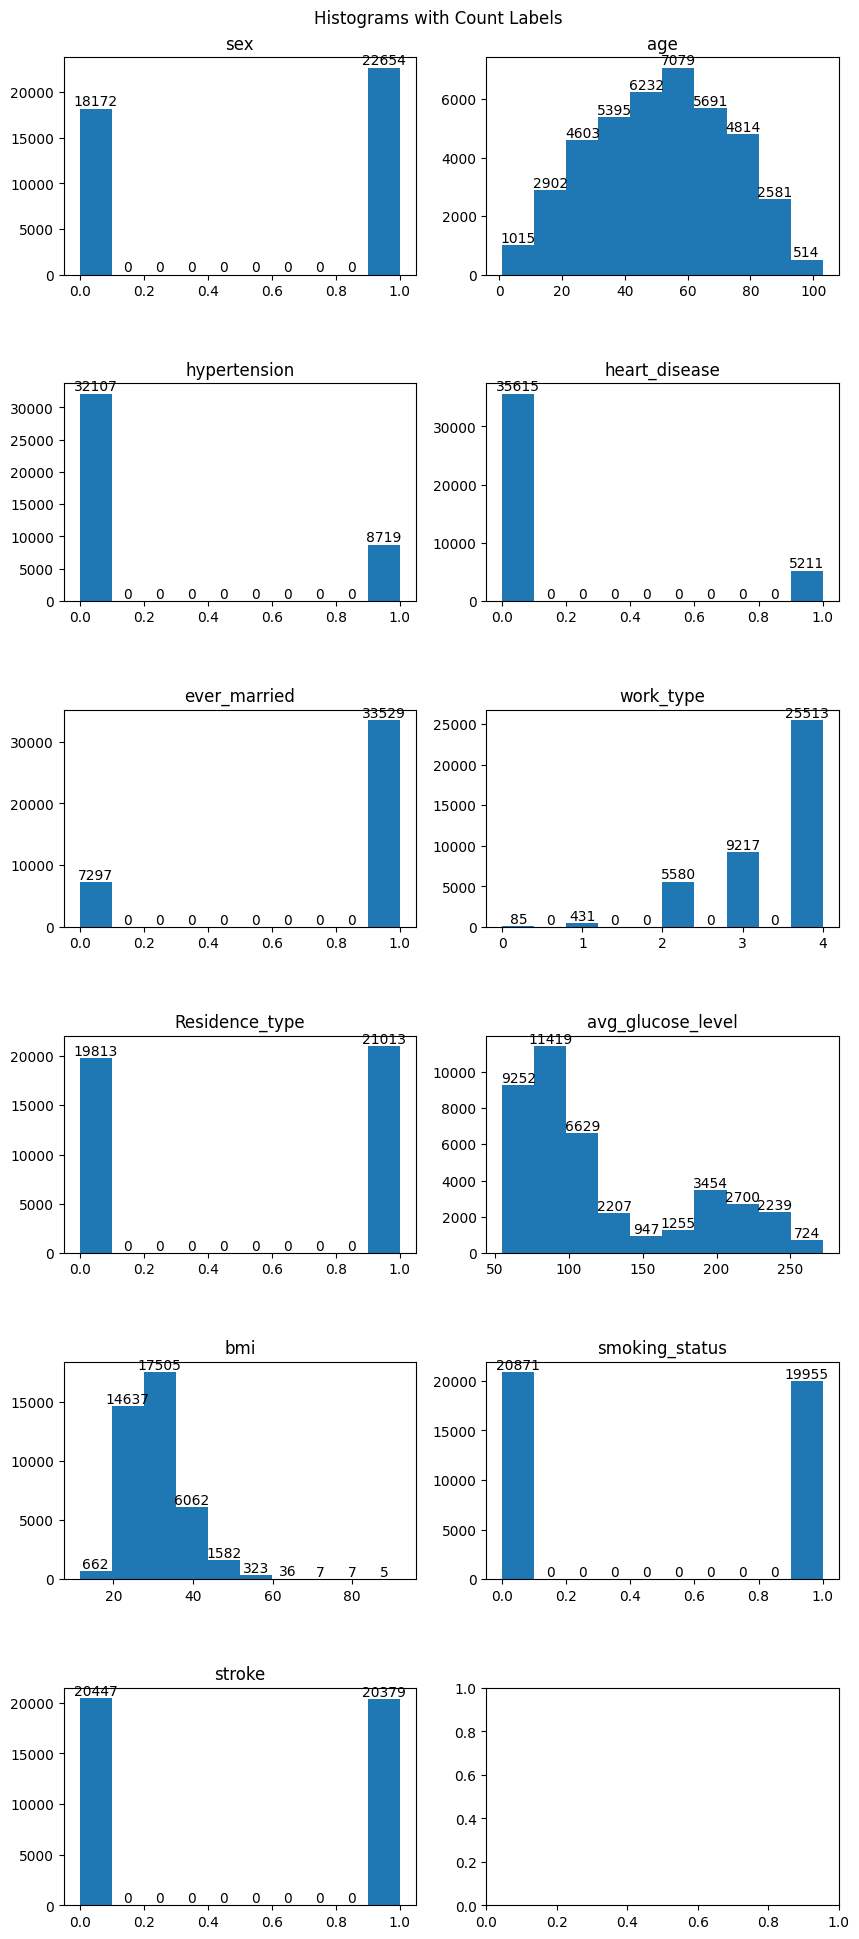

In [16]:
#Plotten der Subplots als Übersicht über Datensatz
#fig, axs = plt.subplots(len(data.columns), 1, figsize=(10,25))

num_columns = len(data.columns)  # Get the number of columns
num_rows = math.ceil(num_columns / 2)  # Calculate the number of rows needed
fig, axs = plt.subplots(num_rows, 2, figsize=(10,4*num_rows), 
                        gridspec_kw = {'hspace':0.5, 'wspace': 0.2})
#fig, axs = plt.subplots(len(data.columns) // 2, 2, figsize=(10, 25),
#                        gridspec_kw={'hspace': 0.2, 'wspace': 0.2})
fig.suptitle('Histograms with Count Labels', y = 0.9)
axs = axs.flatten()


for i in range(len(data.columns)):
    axs[i].hist(data[data.columns[i]])
    axs[i].set_title(data.columns[i])
    
    for j, patch in enumerate(axs[i].patches):
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_height()
        axs[i].text(x, y, str(int(y)), ha='center', va='bottom')

plt.show()

In [17]:
data.corr()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
sex,1.000000,-0.114671,-0.039458,-0.045572,-0.026237,0.002976,0.003754,-0.039474,-0.006075,-0.027988,-0.111795
age,-0.114671,1.000000,0.016228,0.025383,0.006724,0.004327,0.003478,0.028096,-0.012241,-0.003123,0.063873
hypertension,-0.039458,0.016228,1.000000,0.080084,0.033911,-0.033012,-0.002707,0.203391,0.082594,-0.017539,0.257093
heart_disease,-0.045572,0.025383,0.080084,1.000000,0.071729,0.049650,0.013206,0.252419,0.021240,0.136708,0.224154
ever_married,-0.026237,0.006724,0.033911,0.071729,1.000000,0.051814,-0.057213,0.160179,0.113732,0.137442,0.181877
work_type,0.002976,0.004327,-0.033012,0.049650,0.051814,1.000000,-0.011452,0.018509,0.074755,0.053139,0.026320
Residence_type,0.003754,0.003478,-0.002707,0.013206,-0.057213,-0.011452,1.000000,0.016757,0.037485,0.017867,0.011468
avg_glucose_level,-0.039474,0.028096,0.203391,0.252419,0.160179,0.018509,0.016757,1.000000,0.242651,0.056975,0.265722
bmi,-0.006075,-0.012241,0.082594,0.021240,0.113732,0.074755,0.037485,0.242651,1.000000,0.042705,0.018275
smoking_status,-0.027988,-0.003123,-0.017539,0.136708,0.137442,0.053139,0.017867,0.056975,0.042705,1.000000,0.069005


In [18]:
print(data)


       sex   age  hypertension  heart_disease  ever_married  work_type  \
0      1.0  63.0             0              1             1          4   
1      1.0  42.0             0              1             1          4   
2      0.0  61.0             0              0             1          4   
3      1.0  41.0             1              0             1          3   
4      1.0  85.0             0              0             1          4   
...    ...   ...           ...            ...           ...        ...   
40905  1.0  38.0             0              0             0          4   
40906  0.0  53.0             0              0             1          4   
40907  1.0  32.0             0              0             1          2   
40908  1.0  42.0             0              0             1          3   
40909  1.0  35.0             0              0             0          4   

       Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0                   1             228.

<Axes: >

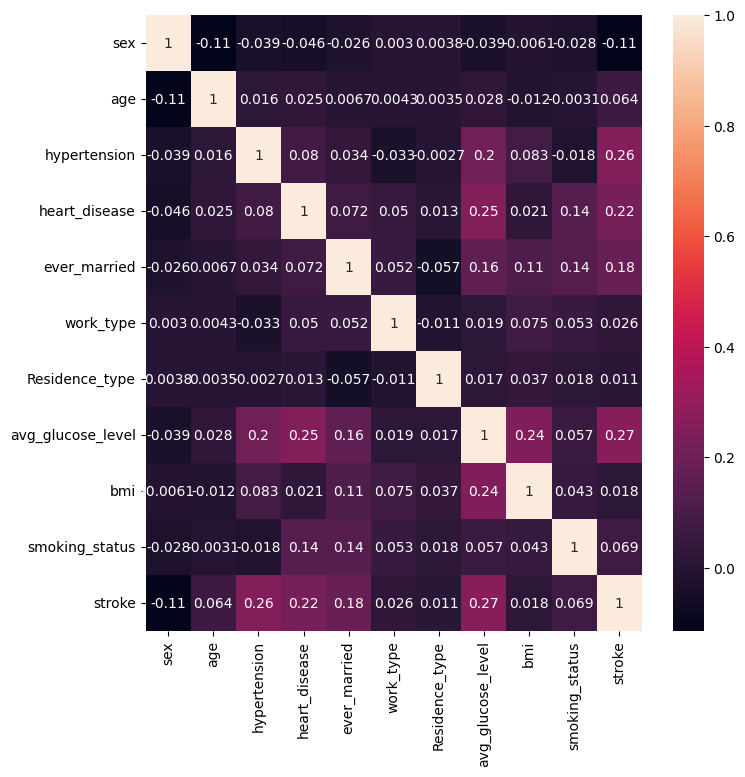

In [19]:
#Plotten von heatmap für Korrelationen
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True)
#die drei Faktoren "Glucose Level", "Hypertension" und "Heart Disease" scheinen den größten Einfluss zu besitzen 

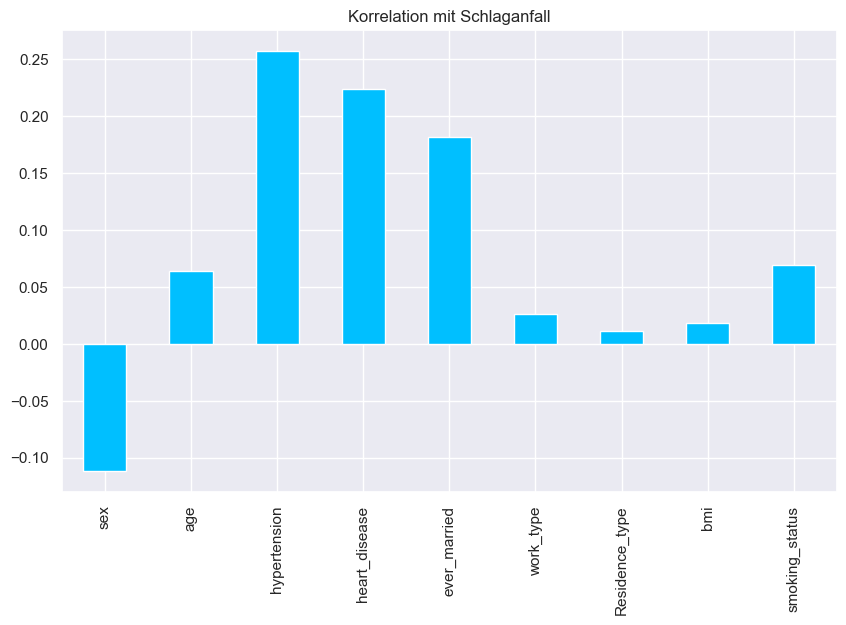

In [50]:
#check Korrelation der verbleibenden Merkmalen mit Schlaganfall
data.drop('stroke', axis=1).corrwith(data.stroke).plot(kind='bar', grid=True, figsize=(10, 6), title="Korrelation mit Schlaganfall",color="deepskyblue");


In [21]:
#Check auf Verteilung zwischen Schlaganfall Ja(1)/Nein(0)
data.groupby(['stroke']).size()


stroke
0    20447
1    20379
dtype: int64

In [22]:
print(data.shape)

(40826, 11)


In [23]:
#Cross-Check ob Effekt unterschiedlich bei Frauen und Männern
data_female = data.loc[data.loc[:,'sex']==0,:]
data_female = data_female.drop(columns=['sex'])
data_male = data.loc[data.loc[:,'sex']==1,:]
data_male = data_male.drop(columns=['sex'])


In [24]:
print(data)

       sex   age  hypertension  heart_disease  ever_married  work_type  \
0      1.0  63.0             0              1             1          4   
1      1.0  42.0             0              1             1          4   
2      0.0  61.0             0              0             1          4   
3      1.0  41.0             1              0             1          3   
4      1.0  85.0             0              0             1          4   
...    ...   ...           ...            ...           ...        ...   
40905  1.0  38.0             0              0             0          4   
40906  0.0  53.0             0              0             1          4   
40907  1.0  32.0             0              0             1          2   
40908  1.0  42.0             0              0             1          3   
40909  1.0  35.0             0              0             0          4   

       Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0                   1             228.

<Axes: title={'center': 'Heatmap für Herren'}>

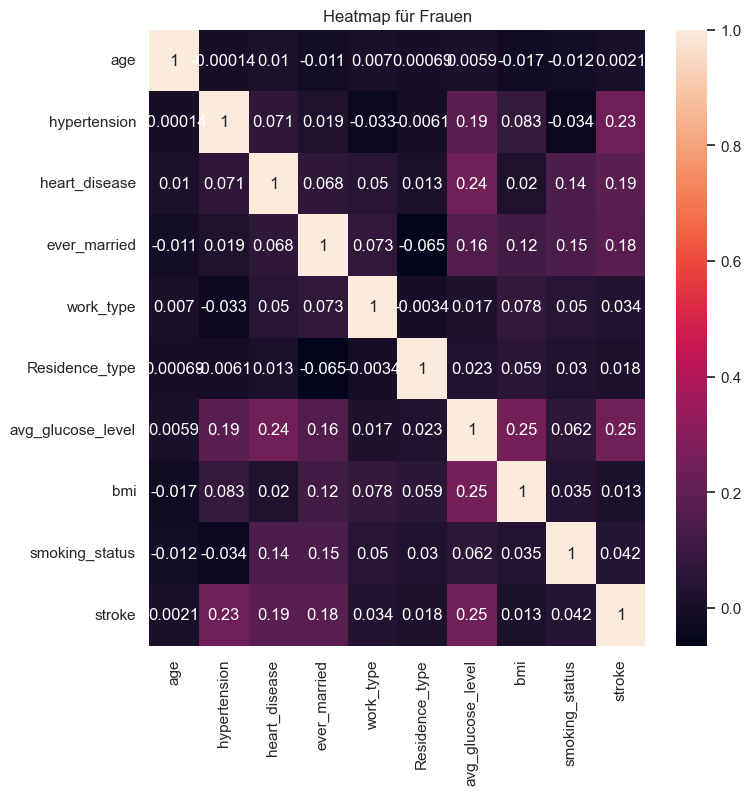

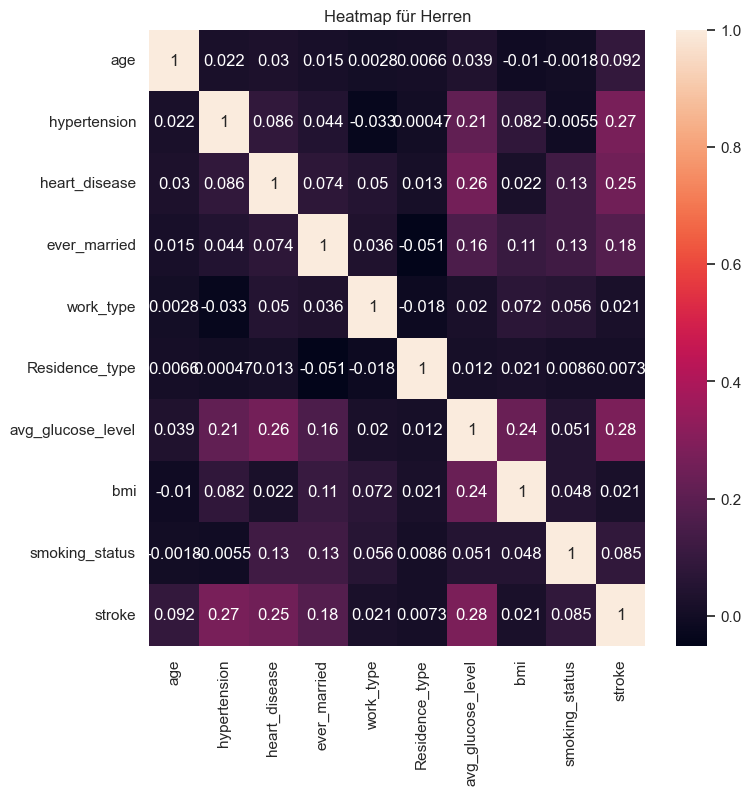

In [58]:
#heatmap pro Gender
plt.figure(figsize=(8,8))
plt.title("Heatmap für Frauen")
sns.heatmap(data_female.corr(), annot=True)
plt.figure(figsize=(8,8))
plt.title("Heatmap für Herren")
sns.heatmap(data_male.corr(), annot=True)

#Die relevanten Features sind die gleichen, aber bei Herren ist die Korrelation ausgeprägter als bei Frauen. 

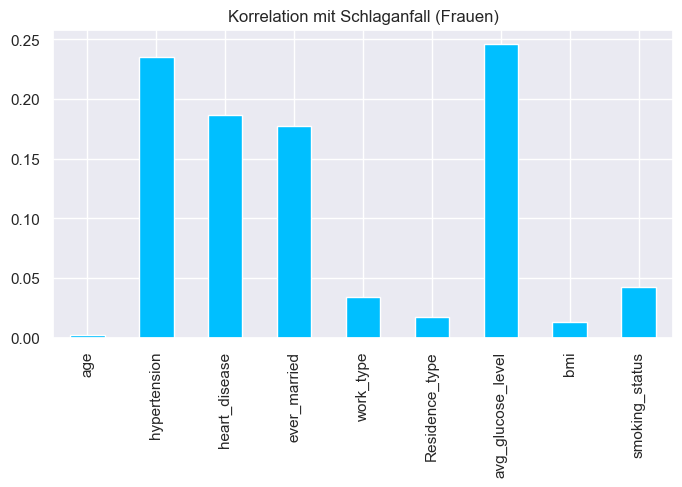

In [60]:
#Separater Korrelationscheck für Frauen und Männer
#Frauen
data_female.drop('stroke', axis=1).corrwith(data_female.stroke).plot(kind='bar', grid=True, figsize=(8, 4), 
                                                       title="Korrelation mit Schlaganfall (Frauen)",color="deepskyblue");


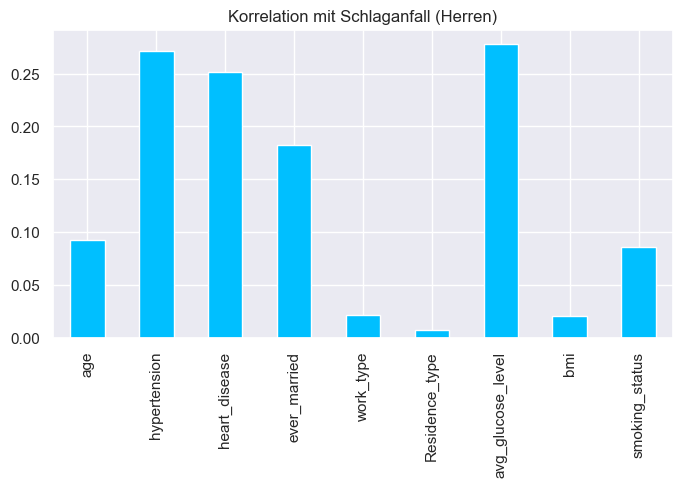

In [62]:
#Männer
data_male.drop('stroke', axis=1).corrwith(data_male.stroke).plot(kind='bar', grid=True, figsize=(8, 4), 
                                                       title="Korrelation mit Schlaganfall (Herren)",color="deepskyblue");


Text(0.5, 1.0, 'Koviariaten')

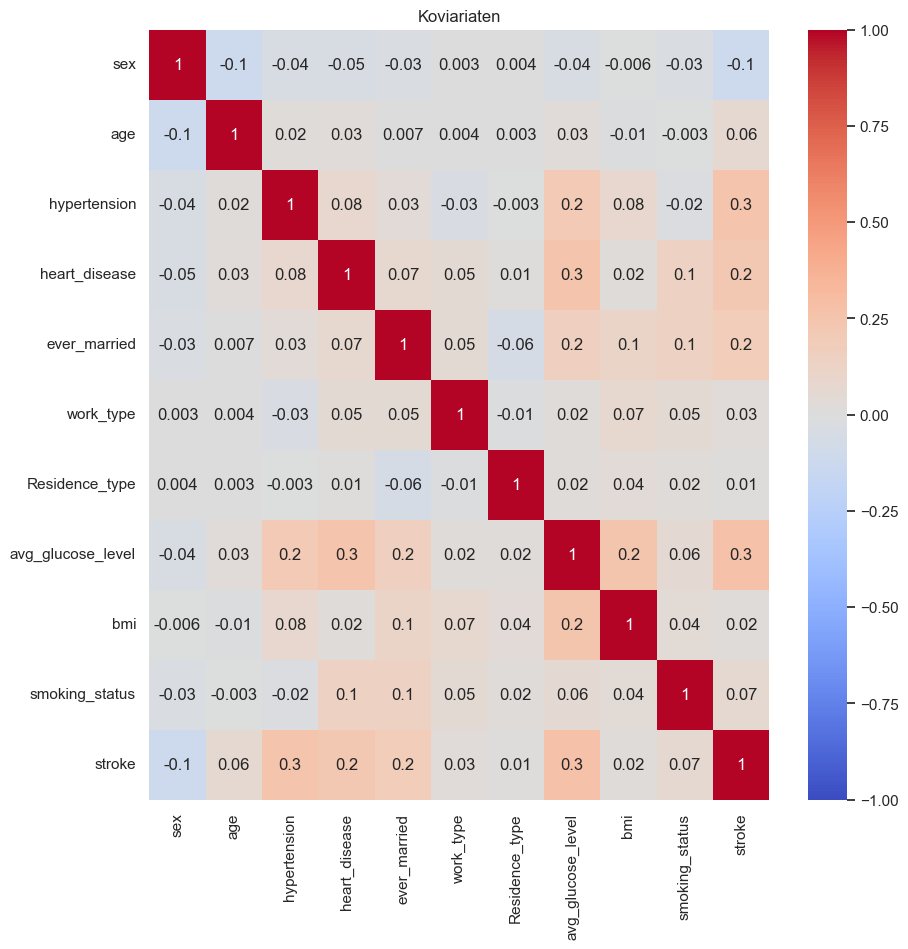

In [28]:
#check auf mögliche Kofaktoren 
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(data.corr(), vmin = -1, annot = True, fmt = '.1g', cmap = 'coolwarm')
plt.title("Koviariaten")


In [30]:
#Überlegung: Entfernen derjenigen Spalten die niedrige Korrelationen mit der Zielspalte haben
#data_red = data.drop(['Residence_type', 'smoking_status', 'bmi','work_type', 'age'],axis = 1, inplace = True)

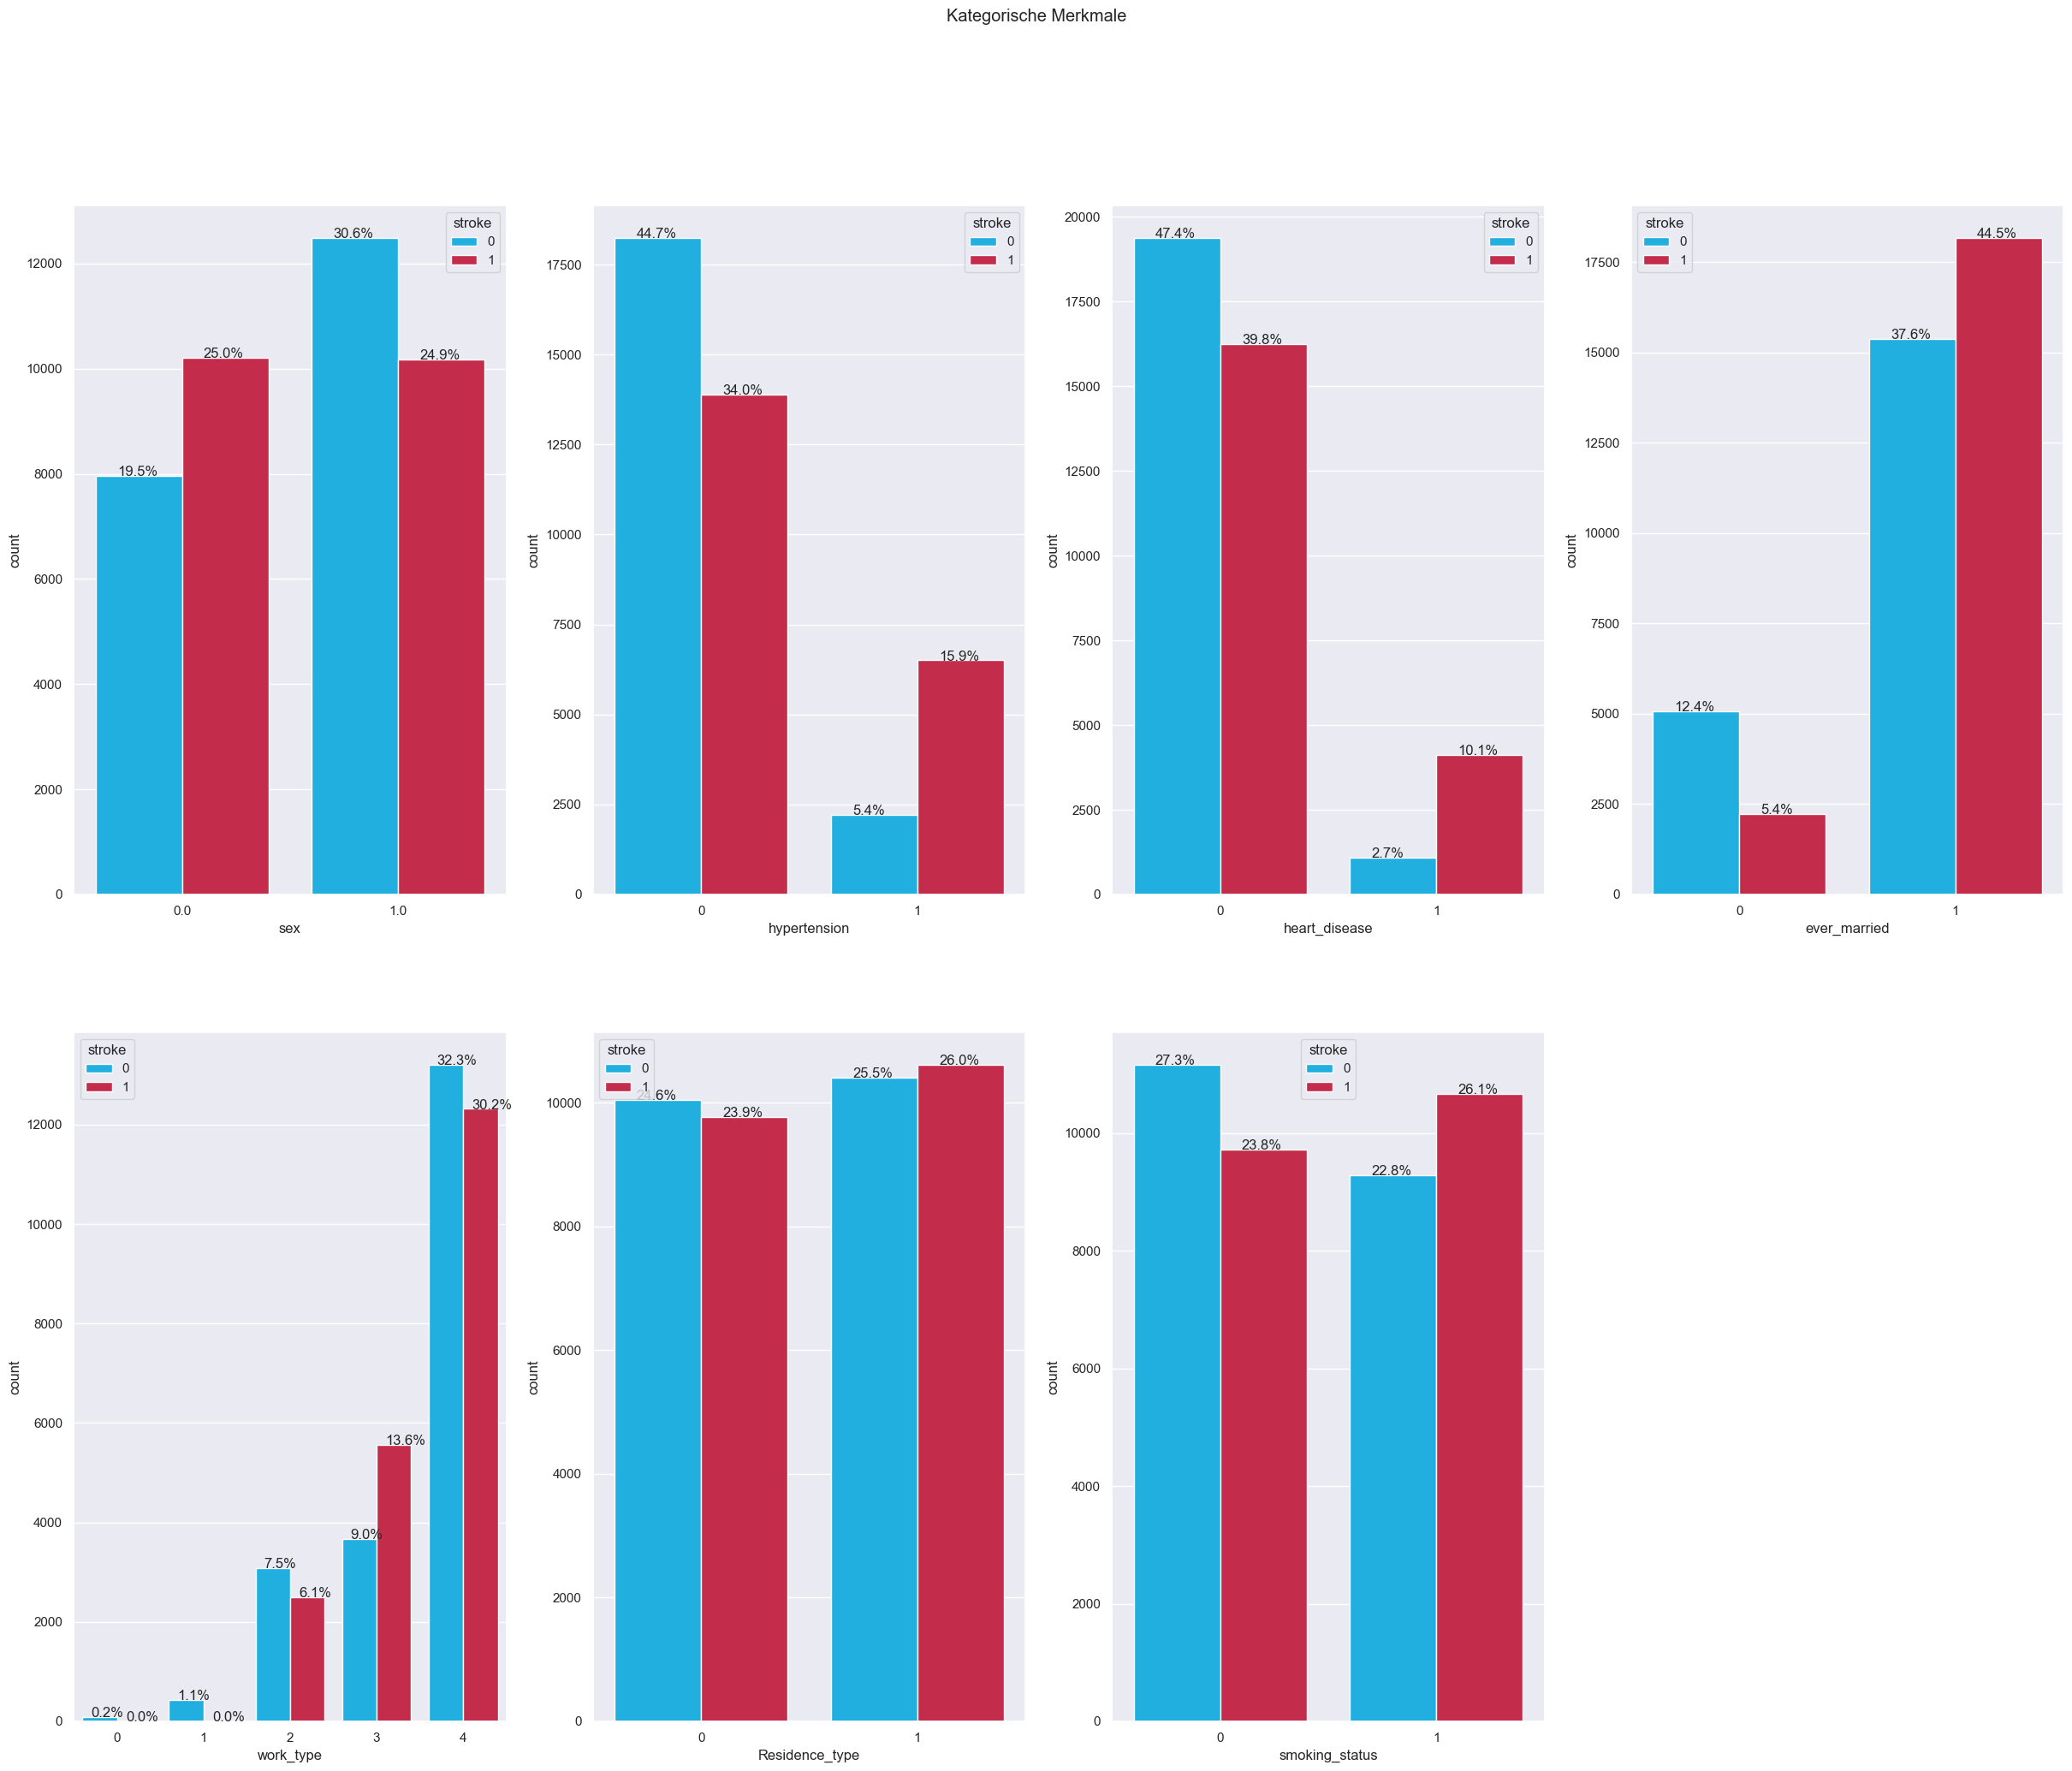

In [31]:
# Bivariate Balkendiagramme für kategorische Merkmale 

features = [x for x in data.columns if x not in ['avg_glucose_level','stroke', 'age', 'bmi']]
plt.figure(figsize = (30,23))
plt.suptitle('Kategorische Merkmale')

#subplots
for i in enumerate(features):
    plt.subplot(2,4, i[0]+1)   
    x = sns.countplot(data=data, x=i[1], hue='stroke', palette = ['deepskyblue','crimson'])
    for z in x.patches:
      x.annotate('{:.1f}'.format((z.get_height()/data.shape[0])*100)+'%',(z.get_x()+0.1, z.get_height()+0.01))

<Figure size 1200x500 with 0 Axes>

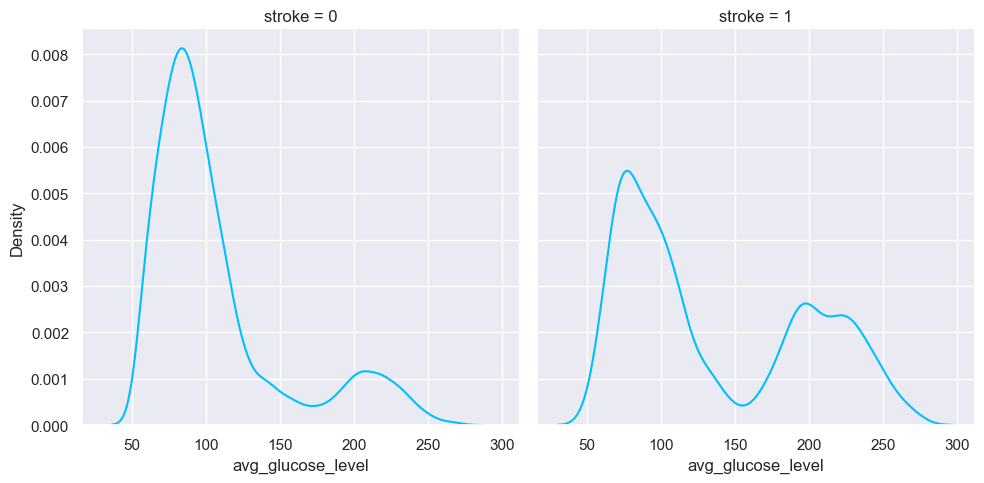

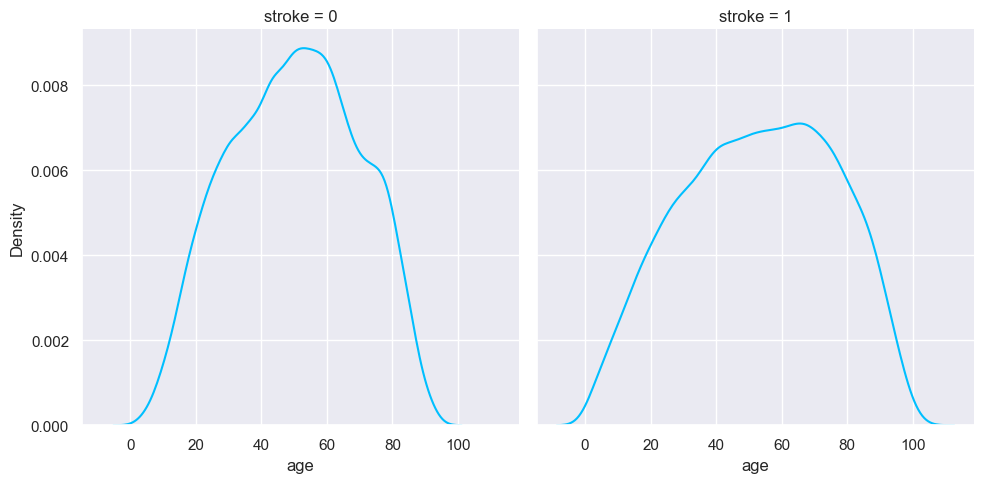

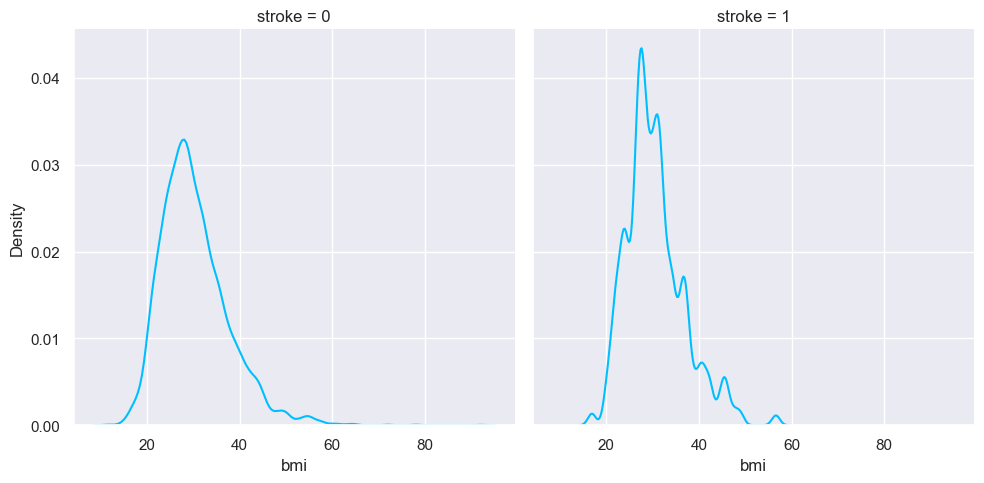

In [32]:
#Bivariate Subplots für numerische Variablen
plt.figure(figsize=(12,5))
sns.displot(x='avg_glucose_level', col='stroke' , data = data, kind="kde" ,color = 'deepskyblue')
sns.displot(x='age', col='stroke' , data = data, kind="kde" ,color = 'deepskyblue')
sns.displot(x='bmi', col='stroke' , data = data, kind="kde" ,color = 'deepskyblue')

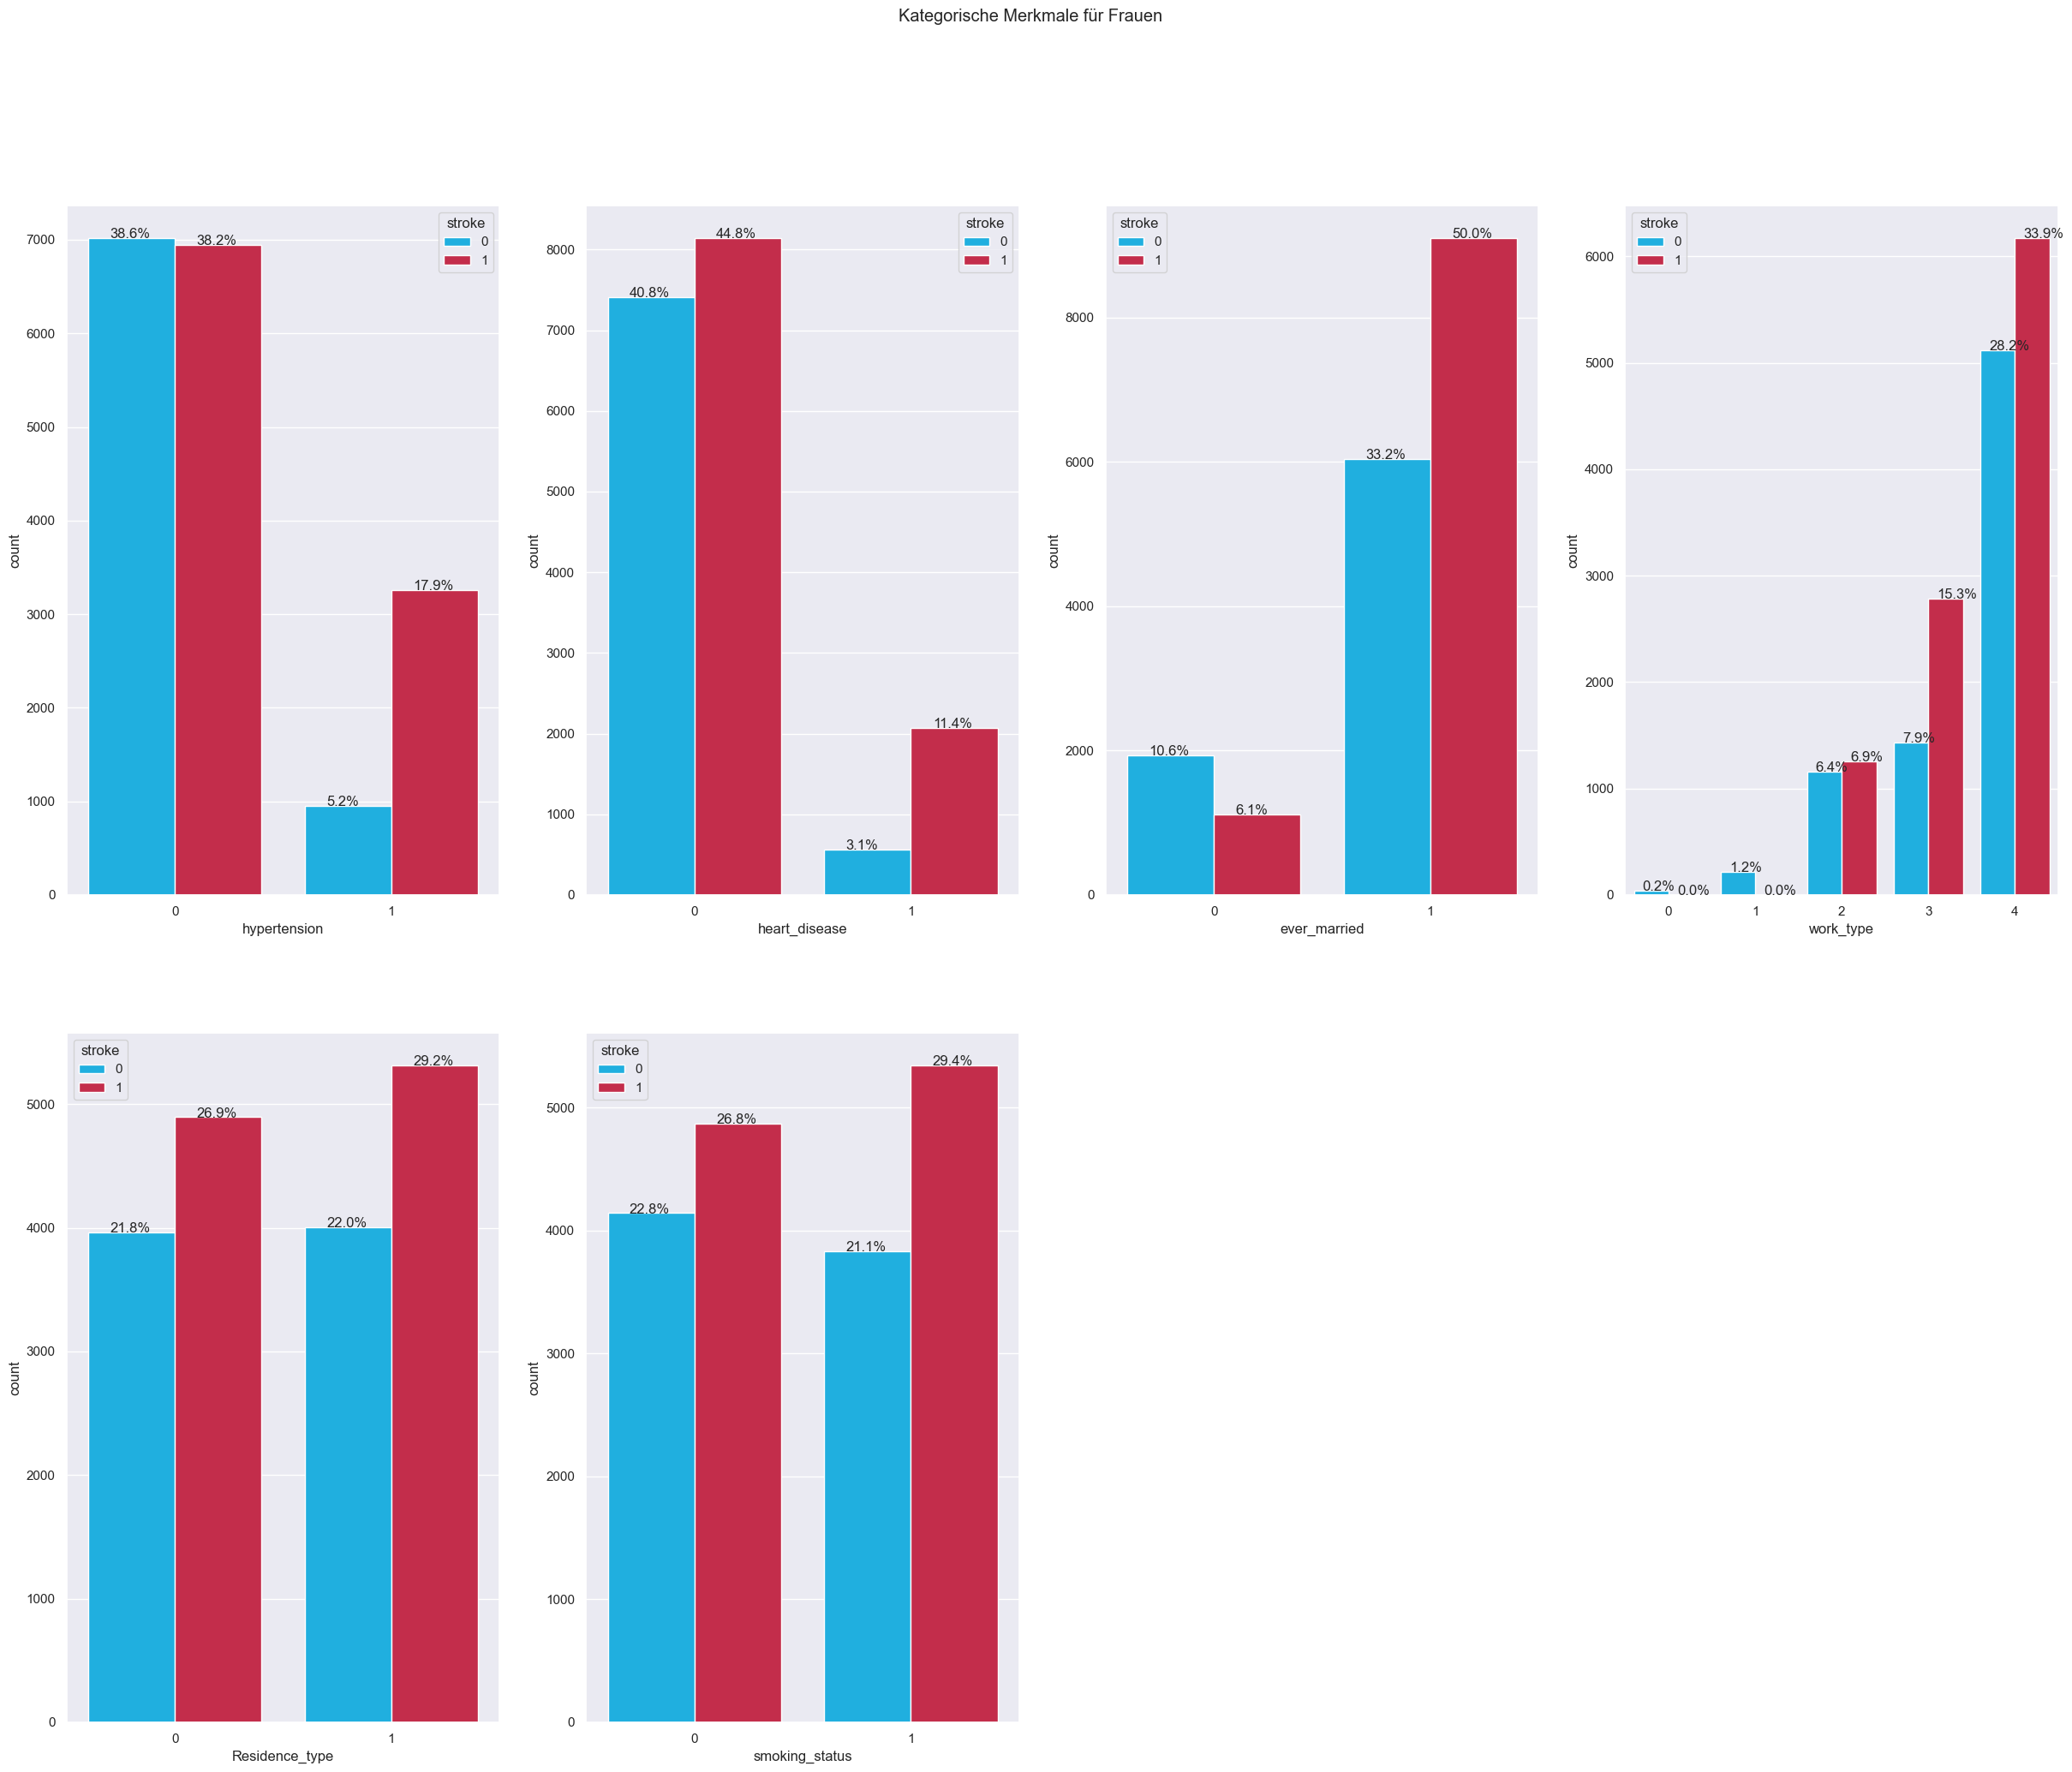

In [75]:
features = [x for x in data_female.columns if x not in ['avg_glucose_level','stroke', 'age', 'bmi']]
plt.figure(figsize = (30,23))
plt.suptitle('Kategorische Merkmale für Frauen')

#subplots
for i in enumerate(features):
    plt.subplot(2,4, i[0]+1)   
    x = sns.countplot(data=data_female, x=i[1], hue='stroke', palette = ['deepskyblue','crimson'])
    for z in x.patches:
      x.annotate('{:.1f}'.format((z.get_height()/data_female.shape[0])*100)+'%',(z.get_x()+0.1, z.get_height()+0.01))

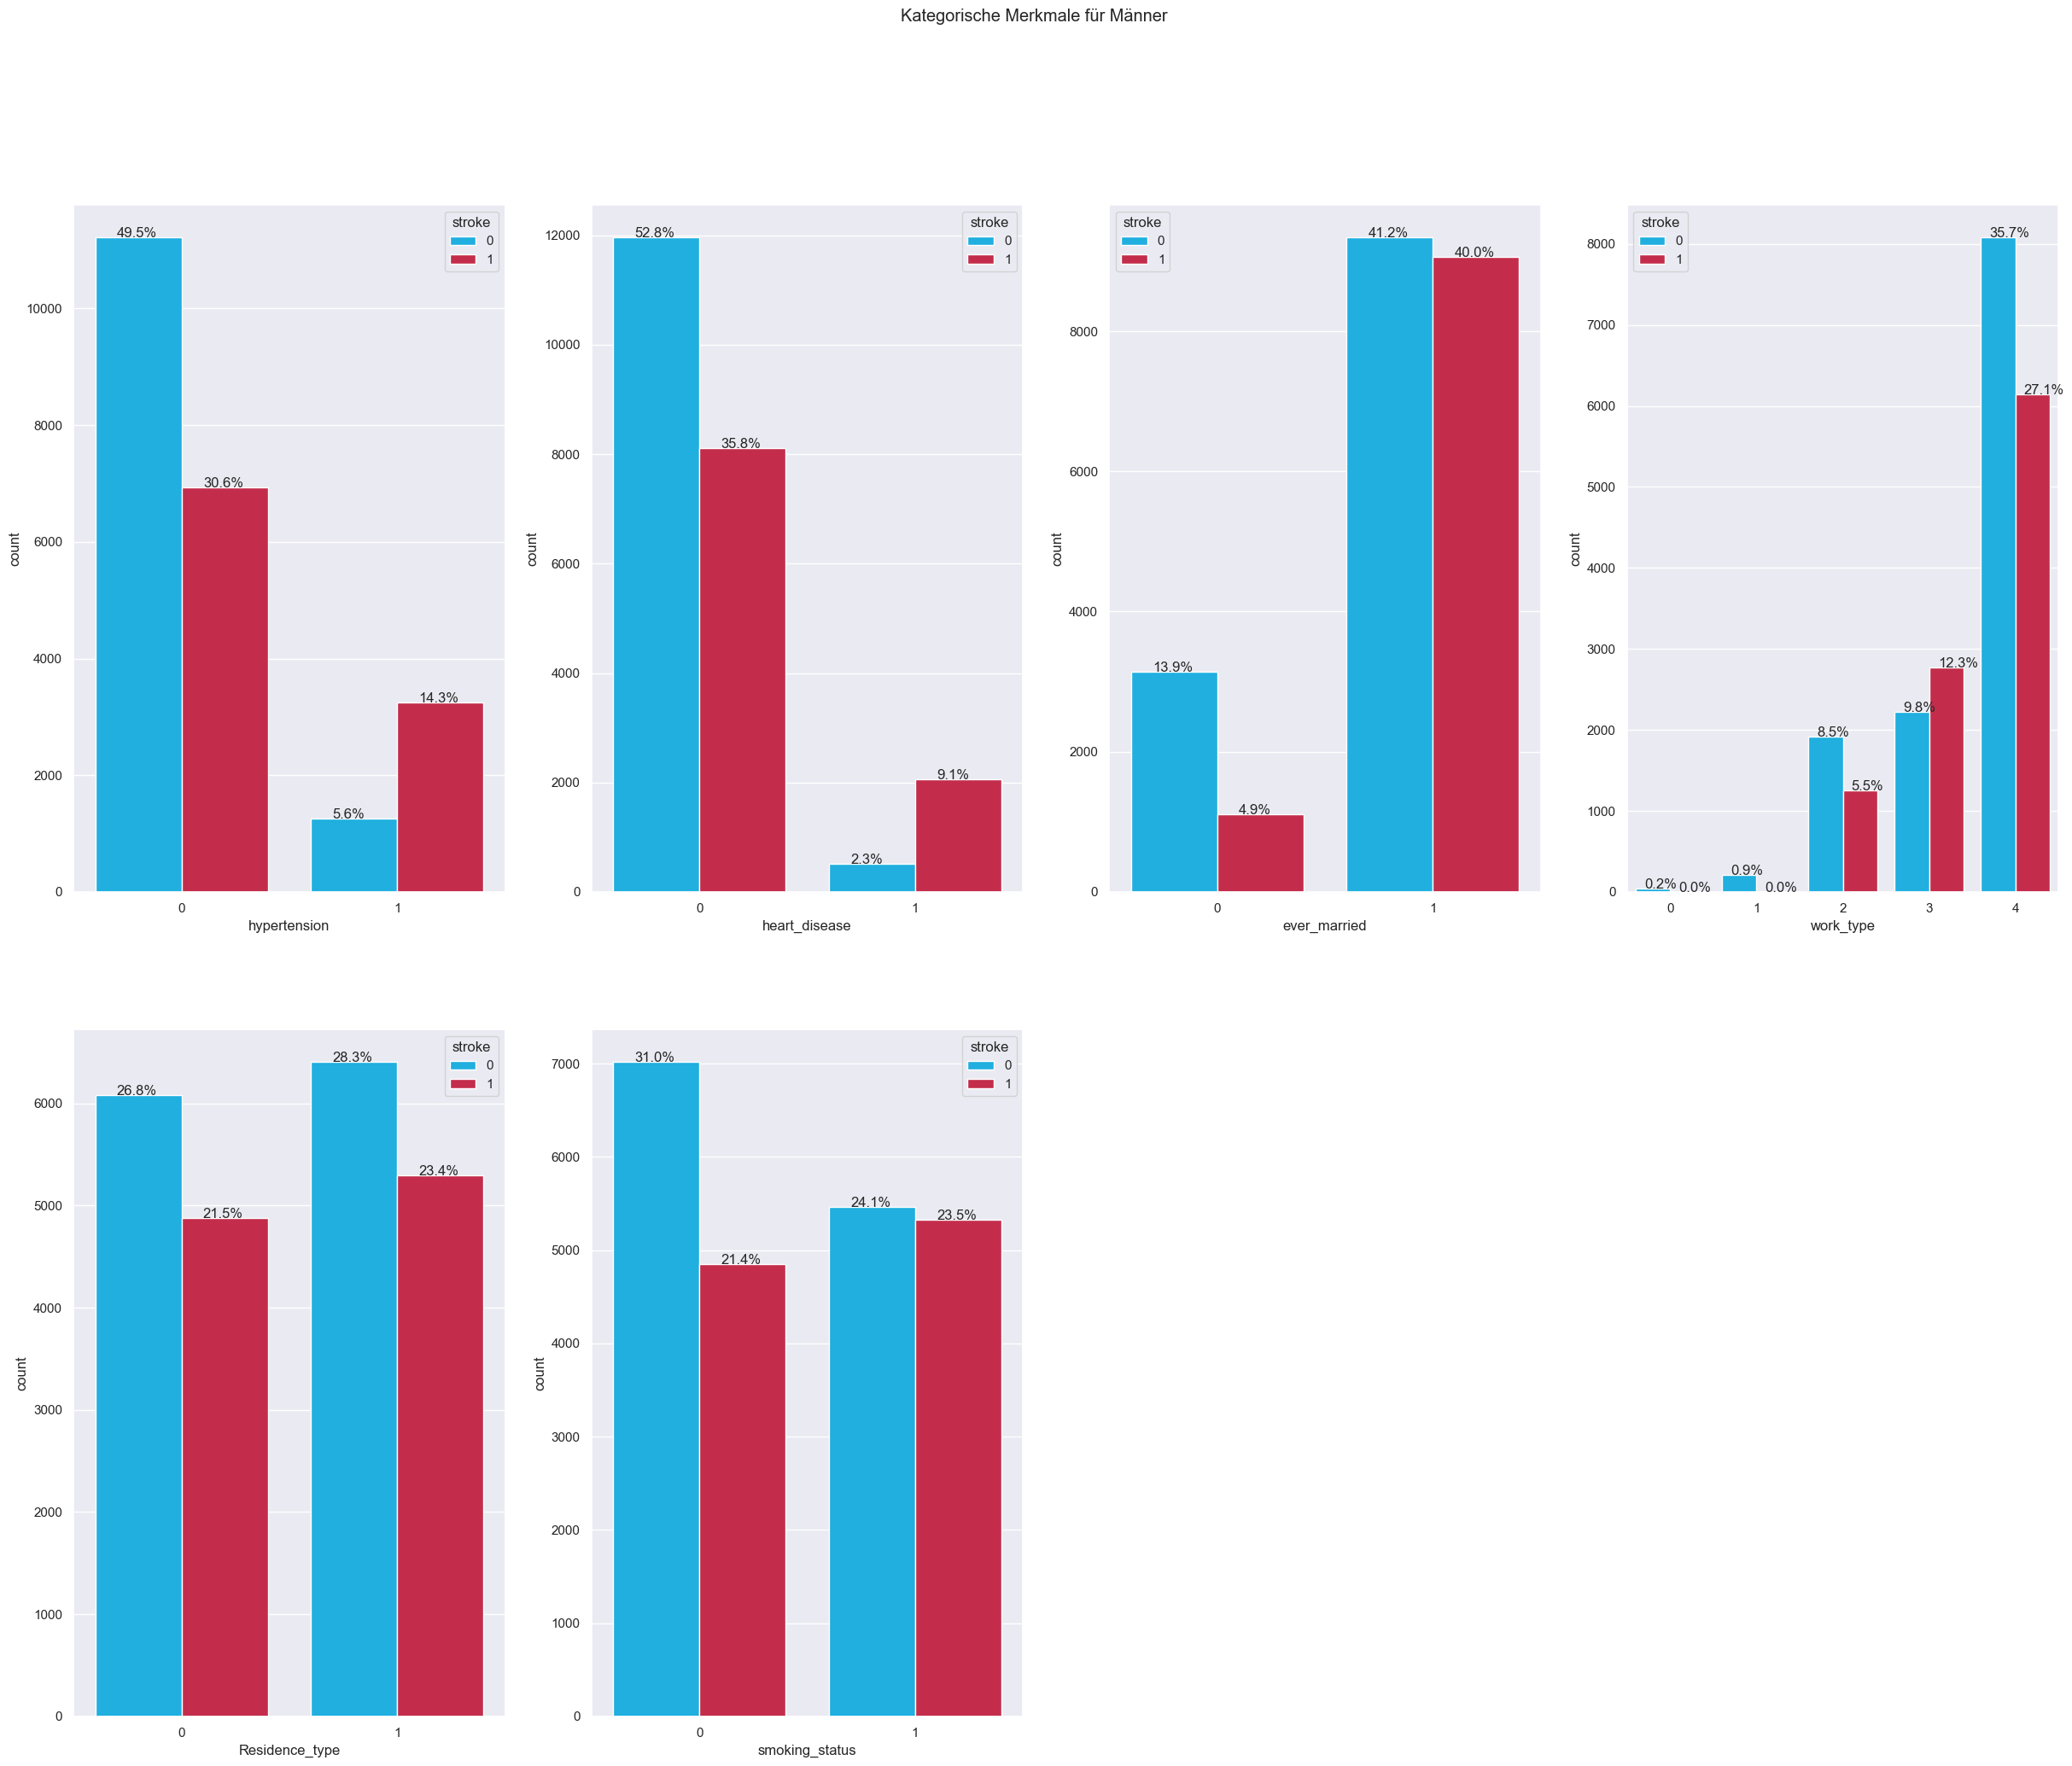

In [79]:
features = [x for x in data_male.columns if x not in ['avg_glucose_level','stroke', 'age', 'bmi']]
plt.figure(figsize = (30,23))
plt.suptitle('Kategorische Merkmale für Männer')

#subplots
for i in enumerate(features):
    plt.subplot(2,4, i[0]+1)   
    x = sns.countplot(data=data_male, x=i[1], hue='stroke', palette = ['deepskyblue','crimson'])
    for z in x.patches:
      x.annotate('{:.1f}'.format((z.get_height()/data_male.shape[0])*100)+'%',(z.get_x()+0.1, z.get_height()+0.01))

In [35]:
#avg_glucose_level sieht ungleich verteilt aus, daher Check nach "Skewness"
data_skew = data[['avg_glucose_level']]
skew = pd.DataFrame(data_skew.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

#Verdacht bewahrheitet sich. Daher nun Daten skalieren damit das Modell später besser performt. 

,skew,too_skewed
avg_glucose_level,0.945346,True


In [36]:
#Datenerhebung zu avg_glucose_level ist nicht spezifiziert im Fragebogen bzw. erschließt sich mir nicht. 
#Die Korrelation scheint mit diesem Feature allerdings am höchsten zu sein. 
#Ich verkleinere den Datensatz um dieses Feature erstelle aber eine Kopie ikl. Glukose falls ich später etwas überprüfen möchte
data_withglucose = data.copy()

data = data.drop(columns=['avg_glucose_level'])
print(data_withglucose.shape)
print(data.shape)


(40826, 11)
(40826, 10)


In [37]:
#datensatz in x und y aufteilen, stroke ist die Zielspalte 
X = data.drop('stroke',axis=1)
y = data.loc[:,'stroke']


In [ ]:
type(X)

In [38]:
#pre-processing mit StandardScaler um die Werte zu normalisieren. 
#Fit berechnet den Durchschnitt/Standardabweichung und Transform berechnet die "Normalisierung"
#dann Durchführung der PCA (mit komplett X - tts erst hinterher)


#Skalieren der unabhängigen Variablen 
scaler_1 = StandardScaler()
scaler_1.fit(X) 
X_scaled = scaler_1.transform(X)

# scaler_3 = RobustScaler()
# scaler_3.fit(X)
# X_scaled = scaler_3.transform(X)

#Splitten der Daten in Train und Test Daten 
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.2, random_state = 42)

#Splitten der Trainingsdaten in Train- und Validierungdaten
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [39]:
print(X.shape)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)


(40826, 9)
(26128, 9)
(6532, 9)
(8166, 9)
(26128,)
(6532,)
(8166,)


C:\Users\noemi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Accuracy der Logistischen Regresiion auf den Validierungsdaten: 0.644978567054501


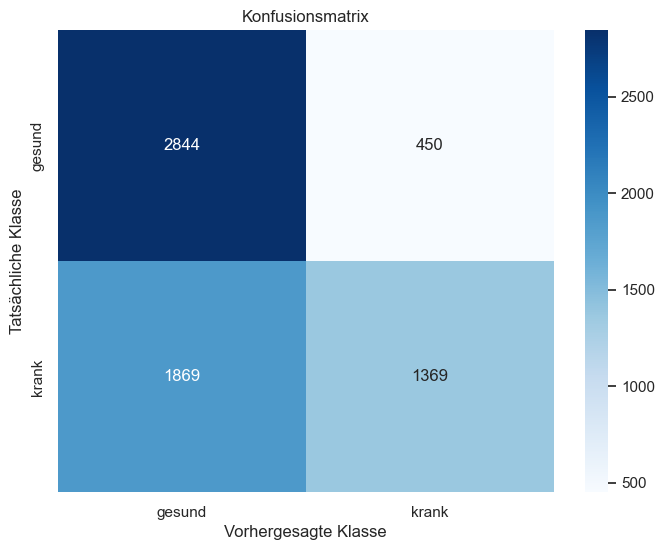

Klassifizierungstabelle:
[[2844  450]
 [1869 1369]]
Koeffizienten der logistischen Regression:
[[-0.40165922  0.00490301  1.35028382  1.34708887  0.97449177  0.06027561
   0.11653637 -0.00902265  0.13601141]]


In [ ]:
#Logistische Regression als einfaches statistisches Modell
logreg = LogisticRegression(random_state=42)

#Trainieren auf Trainingsdaten
logreg.fit(X_train, y_train)

#Vorhersage auf Validierungsdaten
y_val_Log_pred = logreg.predict(X_val)

#Berechnen der Accuracy auf den Validierungsdaten
accuracy_Log = accuracy_score(y_val, y_val_Log_pred)
print("Accuracy der Logistischen Regresiion auf den Validierungsdaten:", accuracy_Log)

#Genauigkeit auf den Testdaten
y_test_SVC_pred = logreg.predict(X_test)
test_LOG_accuracy = accuracy_score(y_test, y_test_LOG_pred)
print("Accuracy der Logistischen Regresiion auf den Testdaten:", test_LOG_accuracy)

confusion_matrix_logreg = confusion_matrix(y_val, y_val_Log_pred)
class_names = ['gesund', 'krank']

#Plot der Konfusionsmatrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_logreg, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Tatsächliche Klasse')
plt.title('Konfusionsmatrix')
plt.show()

print("Klassifizierungstabelle:")
print(confusion_matrix_logreg)

#Check welche Gewichte/Koeffizienten wie relevant sind für die Vorhersage
coefficients_logreg = logreg.coef_
print("Koeffizienten der logistischen Regression:")
print(coefficients_logreg)


In [103]:
#Support Vector Classifier 

#Erstellen des Models
svc = SVC(kernel='linear', C=1.0, random_state=42)
svc.fit(X_train, y_train)

#Vorhersage/Evaluation auf den Validierungsdaten
y_val_SVC_pred = svc.predict(X_val)
val_SVC_accuracy = accuracy_score(y_val, y_val_SVC_pred)
print("Genauigkeit der SVC auf den Validierungsdaten:", val_SVC_accuracy)

#Vorhersage/Evaluation auf den Testdaten
y_test_SVC_pred = svc.predict(X_test)
test_SVC_accuracy = accuracy_score(y_test, y_test_SVC_pred)
print("Genauigkeit der SVC auf den Testdaten:", test_SVC_accuracy)





C:\Users\noemi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Genauigkeit auf den Validierungsdaten: 0.6604409063074097
Genauigkeit auf den Testdaten: 0.656747489590987


In [106]:
#Hyperparameteroptimierung für SVC mit Gridsearch


# Gridsearch Model erstellen
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf'],}
grid_search_SVC = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')

#Gridsearch auf den Trainingsdaten
grid_search_SVC.fit(X_train, y_train)
print("Beste Hyperparameter:", grid_search_SVC.best_params_)

#Trainieren des SVC mit den identifizierten besten Parametern
best_params = grid_search_SVC.best_params_
best_SVC = SVC(**best_params, random_state=42)
best_SVC.fit(X_train, y_train)

y_val_best_SVC_pred = best_SVC.predict(X_val)
val_best_SVC_accuracy = accuracy_score(y_val, y_val_best_SVC_pred)
print("Genauigkeit der optimierten SVC auf Validierungsdaten nach Parameteroptimierung:", val_best_SVC_accuracy)

y_test_best_SVC_pred = best_SVC.predict(X_test)
test_best_SVC_accuracy = accuracy_score(y_test, y_test_best_SVC_pred)
print("Genauigkeit der optimierten SVC auf Testdaten nach Parameteroptimierung:", test_best_SVC_accuracy)


Beste Hyperparameter: {'C': 10, 'kernel': 'rbf'}


C:\Users\noemi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Genauigkeit der optimierten SVC auf Validierungsdaten nach Parameteroptimierung: 0.656307409675444
Genauigkeit der optimierten SVC auf Testdaten nach Parameteroptimierung: 0.6767083027185893


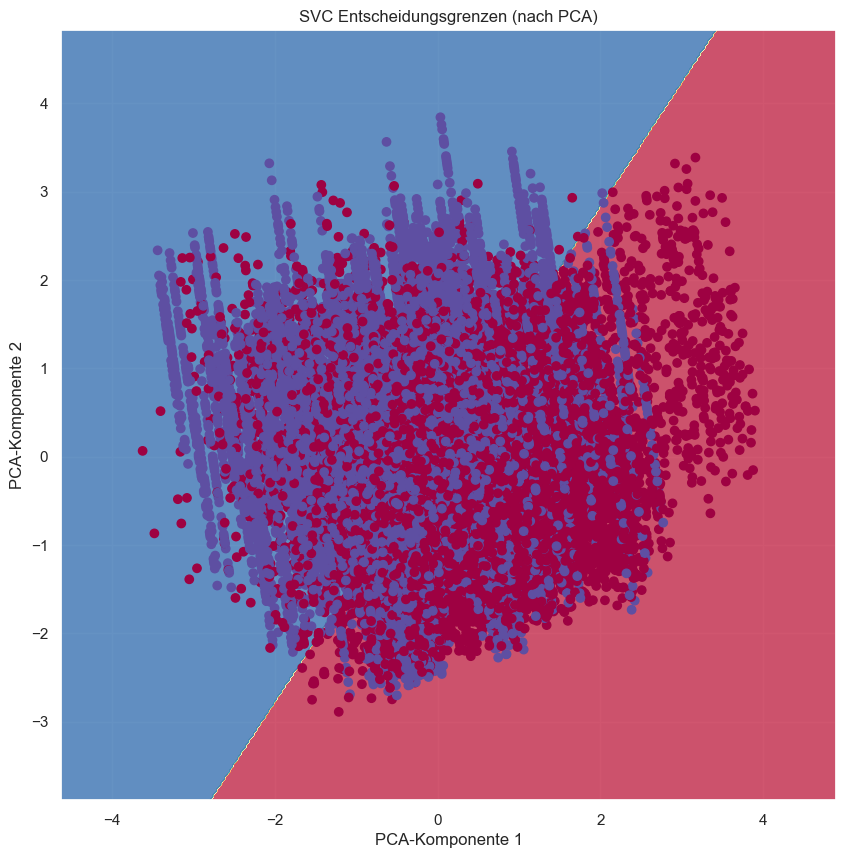

In [42]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Annahme: Du hast neun Merkmale in X_train
# Reduziere die Dimensionen auf zwei mit PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Trainiere das SVC-Modell auf den reduzierten Daten
svc = SVC(kernel='linear', C=1.0, random_state=42)
svc.fit(X_train_pca, y_train)

# Meshgrid erstellen
h = .02  # Schrittgröße im Netz
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Vorhersagen für jedes Gitterpunkt machen
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotte die Entscheidungsgrenzen und Datenpunkte
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],
            c=y_train, cmap=plt.cm.Spectral)
plt.xlabel('PCA-Komponente 1')
plt.ylabel('PCA-Komponente 2')
plt.title('SVC Entscheidungsgrenzen (nach PCA)')
plt.show()


In [107]:
#Wahrscheinlichkeit der Erkrankung an Schlaganfall via class probability

class ProbabilityCalculator_SVC:
    def __init__(self, model):
        self.model = model

    def calculate_proba_numpy(self, data):
        # Für numpy-Arrays
        return self.model.predict_proba(data)

    def calculate_proba_tensor(self, data):
        # Für PyTorch-Tensoren
        with torch.no_grad():
            data_tensor = torch.tensor(data, dtype=torch.float32)
            probs = self.model.predict_proba(data_tensor)
            return probs.numpy()

# Annahme: Du hast bereits svc_model erstellt und trainiert
svc_model = SVC(probability=True, kernel='rbf',
                C=1.0, gamma='scale', random_state=42)
svc_model.fit(X_train, y_train)

# Erstelle die ProbabilityCalculator-Instanz
probability_calculator = ProbabilityCalculator_SVC(svc_model)

# Berechne Wahrscheinlichkeiten für Testdaten in numpy-Format
probs_numpy_test = probability_calculator.calculate_proba_numpy(X_test)

# Berechne Wahrscheinlichkeiten für Testdaten in tensor-Format
#probs_tensor_test = probability_calculator.calculate_proba_tensor(X_test_tensor)

print("Klassenwahrscheinlichkeit (np)", probs_numpy_test)
#print("Klassenwahrscheinlichkeit (tensor)", probs_tensor_test)


Klassenwahrscheinlichkeit (np) [[0.59386009 0.40613991]
 [0.56877502 0.43122498]
 [0.55938212 0.44061788]
 ...
 [0.33460468 0.66539532]
 [0.52165185 0.47834815]
 [0.71032574 0.28967426]]


In [ ]:
#KNN Classifier als nächste Methode --- hier mit zusätzlicher Min_Max Skalierung

# Erstelle und trainiere den K-Nearest Neighbors (K-NN) Classifier
# Du kannst die Anzahl der Nachbarn anpassen

scaler_2 = MinMaxScaler()
scaler_2.fit(X_scaled)
X_scaled_2 = scaler_2.transform(X_scaled)

# Splitten der Daten in Train und Test Daten
X_train_MM, X_test_MM, y_train_MM, y_test_MM = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Splitten der Trainingsdaten in Train- und Validierungdaten
X_train_MM, X_val_MM, y_train_MM, y_val_MM = train_test_split(
    X_train_MM, y_train_MM, test_size=0.2, random_state=42)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_MM, y_train_MM)

# Mache Vorhersagen auf den Validierungsdaten
y_val_KNN_pred = knn.predict(X_val_MM)

# Evaluieren der Genauigkeit auf den Validierungsdaten
val_KNN_accuracy = accuracy_score(y_val_MM, y_val_KNN_pred)
print("Genauigkeit auf den Validierungsdaten:", val_KNN_accuracy)

# Mache Vorhersagen auf den Testdaten
y_test_KNN_pred = knn.predict(X_test_MM)

# Evaluieren der Genauigkeit auf den Testdaten
test_KNN_accuracy = accuracy_score(y_test_MM, y_test_KNN_pred)
print("Genauigkeit auf den Testdaten:", test_KNN_accuracy)


In [111]:
# KNN Classifier als nächste Methode --- ohne Min_Max Skalierung

#Erstellen und Trainieren des Modells
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#Vorhersage/Akkuranz auf den Validierungsdaten
y_val_KNN_pred = knn.predict(X_val)
val_KNN_accuracy = accuracy_score(y_val, y_val_KNN_pred)
print("Genauigkeit der KNN auf den Validierungsdaten:", val_KNN_accuracy)

#Vorhersage/Akkuranz auf den Testdaten
y_test_KNN_pred = knn.predict(X_test)
test_KNN_accuracy = accuracy_score(y_test, y_test_KNN_pred)
print("Genauigkeit der KNN auf den Testdaten:", test_KNN_accuracy)


C:\Users\noemi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Genauigkeit der KNN auf den Validierungsdaten: 0.49770361298224125
Genauigkeit der KNN auf den Testdaten: 0.7363458241489101


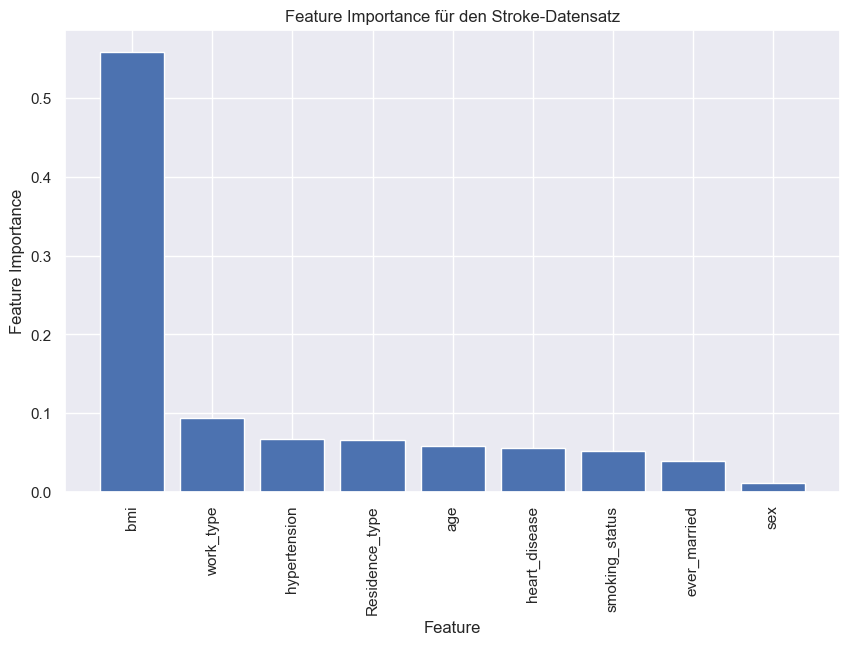

In [112]:
# Annahme: Sie haben X_train, y_train, X_test und y_test bereits vorbereitet

#Erstellen des Entscheidungsbaum-Modells
model = DecisionTreeClassifier(random_state=42)

#Trainieren und Feature importance 
model.fit(X_train, y_train)
feature_importance = model.feature_importances_

#Sortieren der Features nach absteigender Relevanz
feature_names = X_train.columns
sorted_idx = np.argsort(feature_importance)[::-1]

# Plot der Feature Importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.xticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Feature Importance für den Stroke-Datensatz")
plt.show()


In [ ]:
class Perzeptron:
    def __init__(self, X_train):
        self.w = np.random.uniform(-1, 1, size=(X_train.shape[1]))
        self.lr = 0.001

        self.error = []
        self.ws = []
        self.bs = []
        self.b = np.random.uniform(-1, 1, size=1)

    def loss(self, y, prediction):
        # Clippen, um log(0) nicht undefiniert zu haben
        prediction = np.clip(prediction, 0.0001, 0.9999)
        loss = -np.mean(y*(np.log(prediction)) + (1-y)*np.log(1-prediction))
        return loss

    def accuracy(self, y, prediction):
        return 1-np.sum((prediction-y)**2)/y.shape[0]

    def predict(self, X_train):
        return np.where(np.dot(X_train, self.w)+self.b >= 0, 1, 0)

    def iteration(self, x, y):
        errors = []

        # für jede Zeile in X
        for xi, yi in zip(X_train, y):
            prediction = self.predict(xi)
            errors.append(self.loss(yi, prediction))

            #Gewichte nach Lernregel anpassen
            self.w = self.w+self.lr*(yi-prediction)*xi
            self.b = self.b+self.lr*(yi-prediction)

        #Fehler speichern für Visualisierung
        self.error.append(np.mean(errors))
        self.ws.append(self.w)
        self.bs.append(self.b)
        

#Modell initialisieren
model_perz = Perzeptron(X_train)

#Epochen trainieren
for _ in range(200):
    model_perz.iteration(X_train, y_train)

#Modell testen
model_perz.accuracy(y_test, model.predict(X_test))

#Modell visualisieren
plt.figure(figsize=(8, 6))
plt.plot(model_perz.error, c="#1ACC94")
plt.title("LogLoss über Epochen")
plt.xlabel("Epochen")
plt.ylabel("LogLoss")
plt.show()




In [ ]:
#Anderes Perzeptron

import numpy as np
from sklearn.metrics import accuracy_score

# Annahme: Du hast bereits X_train, y_train für das Training,
# X_val, y_val für die Validierung und X_test, y_test für das Testen vorbereitet.

# Definition der Perzeptron-Klasse

# print("Form von X_train:", type(X_train))
# print("Form von y_train:", type(y_train))
# print("Form von X_val:", type(X_val))
# print("Form von y_val:", type(y_val))
# print("Form von X_test:", type(X_test))
# print("Form von y_test:", type(y_test))

y_train_numpy = y_train.to_numpy()
y_val_numpy = y_val.to_numpy()
y_test_numpy = y_test.to_numpy()


class Perceptron:
    def __init__(self, learning_rate=0.1, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        # Initialisierung der Gewichtungen und des Schwellenwerts
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.n_iterations):
            for i in range(X.shape[0]):
                # Berechne die Vorhersage
                y_pred = np.dot(X[i], self.weights) + self.bias

                # Aktualisiere die Gewichtungen und den Schwellenwert basierend auf dem Fehler
                if y[i] * y_pred <= 0:
                    self.weights += self.learning_rate * y[i] * X[i]
                    self.bias += self.learning_rate * y[i]

    def predict(self, X):
        # Mache Vorhersagen für eine Menge von Daten
        return np.sign(np.dot(X, self.weights) + self.bias)


# Initialisierung des Perzeptrons und Training
perceptron = Perceptron(learning_rate=0.1, n_iterations=1000)
perceptron.fit(X_train, y_train_numpy)

# Mache Vorhersagen auf den Validierungsdaten
y_val_perc_pred = perceptron.predict(X_val)

# Evaluieren der Genauigkeit auf den Validierungsdaten
val_perc_accuracy = accuracy_score(y_val_numpy, y_val_perc_pred)
print("Genauigkeit auf den Validierungsdaten:", val_perc_accuracy)

# Mache Vorhersagen auf den Testdaten
y_test_perc_pred = perceptron.predict(X_test)

# Evaluieren der Genauigkeit auf den Testdaten
test_perc_accuracy = accuracy_score(y_test_numpy, y_test_perc_pred)
print("Genauigkeit auf den Testdaten:", test_perc_accuracy)


In [ ]:
#Vielleicht multi-layer Perzeptron?
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


# Erstelle und trainiere den MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_classifier.fit(X_train, y_train)

#Vorhersage/Akkuranz auf den Validierungsdaten
y_val_MLP_pred = mlp_classifier.predict(X_val)
val_MLP_accuracy = accuracy_score(y_val, y_val_MLP_pred)
print("Genauigkeit auf den Validierungsdaten:", val_MLP_accuracy)

#Vorhersage/Akkuranz auf den Testdaten
y_test_MLP_pred = mlp_classifier.predict(X_test)
test_MLP_accuracy = accuracy_score(y_test, y_test_MLP_pred)
print("Genauigkeit auf den Testdaten:", test_MLP_accuracy)


Genauigkeit auf den Validierungsdaten: 0.8651255358236375
Genauigkeit auf den Testdaten: 0.8577026696056821


In [ ]:
#Durchführen einer PCA
# components= range(1,X.shape[1])
# #for i in components:
# i=3
# pca = PCA(n_components=i)
# print('PCA components: ', i)
# X_train_scaled_pca = pca.fit_transform(X_train) 
# print("Explained variance ratio",pca.explained_variance_ratio_)

# #PCA variance explanation bedeutet nicht, dass die x-wichtigsten Features ausgespuckt werden 
# #sondern es werden neue Vektoren im Raum "gebaut". Sind nicht mehr die "alten" Features, aber haben weiterhin die gleiche Verteilung meiner Daten. 

# #Embedding - niedriger dimensioniert für bessere Verarbeitung. 

# # hier muss der tts rein. 
# #Teilen der Daten in Train_Test / X_val noch zusätzlich absplitten!


In [ ]:
#Check Datentyp
print(type(X_train))
print(type(X_val))
print(type(X_test))
print(type(y_train))
print(type(y_val))


In [ ]:
# Trainings- und Testdaten zu PyTorch-Tensoren umwandeln als Vorbereitung für NN
X_train_tensor = torch.from_numpy(X_train).float()  # float() ist wichtig
X_val_tensor = torch.from_numpy(X_val).float()
X_test_tensor = torch.from_numpy(X_test).float()
y_train_tensor = torch.tensor(y_train_numpy, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_numpy, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_numpy, dtype=torch.float32)


In [ ]:
#Check Datentyp
print(type(X_train_tensor))
print(type(X_val_tensor))
print(type(y_train_tensor))
print(type(y_val_tensor))


In [ ]:
#Neuronales Netz

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score

# Definition des neuronalen Netzwerks

y_train_tensor = y_train_tensor.view(-1, 1)
y_val_tensor = y_val_tensor.view(-1, 1)
y_test_tensor = y_test_tensor.view(-1, 1)

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out


# Hyperparameter
input_size = X_train_tensor.shape[1]
hidden_size = 64
output_size = 1
learning_rate = 0.001
num_epochs = 10

# Erstelle das neuronale Netzwerk
model_NN = NeuralNetwork(input_size, hidden_size, output_size)

# Loss-Funktion und Optimierer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss für binäre Klassifikation
optimizer = optim.Adam(model_NN.parameters(), lr=learning_rate)

# Konvertiere die Tensoren in PyTorch DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Initialisieren der Listen, um die Genauigkeitswerte zu speichern
train_accuracy_list = []
val_accuracy_list = []
test_accuracy_list = []

# Training des Modells
for epoch in range(num_epochs):
    for batch_X, batch_y in train_loader:
        # Vorwärtsdurchlauf
        outputs = model_NN(batch_X.float())
        loss = criterion(outputs, batch_y.float())

        # Rückwärtsdurchlauf und Optimierung
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    # Evaluation auf den Trainingsdaten
    with torch.no_grad():
        train_NN_outputs = model_NN(X_train_tensor.float())
        train_NN_predictions = (train_NN_outputs >= 0.5).float()
        train_NN_accuracy = accuracy_score(
            y_train_tensor.numpy(), train_NN_predictions.numpy())
    train_accuracy_list.append(train_NN_accuracy)


# Evaluation auf den Validierungsdaten
with torch.no_grad():
    val_NN_outputs = model_NN(X_val_tensor.float())
    val_NN_predictions = (val_NN_outputs >= 0.5).float()
    val_NN_accuracy = accuracy_score(
        y_val_tensor.numpy(), val_NN_predictions.numpy())

print("Genauigkeit auf den Validierungsdaten:", val_NN_accuracy)

# Evaluation auf den Testdaten
with torch.no_grad():
    test_NN_outputs = model_NN(X_test_tensor.float())
    test_NN_predictions = (test_NN_outputs >= 0.5).float()
    test_NN_accuracy = accuracy_score(
        y_test_tensor.numpy(), test_NN_predictions.numpy())

print("Genauigkeit auf den Testdaten:", test_NN_accuracy)


In [ ]:
#Random Search für NeuralNetwork

import random

# Hyperparameterbereiche für die Random Search
learning_rate_range = [0.0001, 0.001, 0.01]
hidden_size_range = [32, 64, 128]
num_epochs_range = [5, 10, 15, 50, 100]

best_accuracy = 0.0
best_hyperparameters = None

# Anzahl der zufälligen Versuche
num_random_search_trials = 10

for _ in range(num_random_search_trials):
    # Zufällige Auswahl der Hyperparameter
    learning_rate = random.choice(learning_rate_range)
    hidden_size = random.choice(hidden_size_range)
    num_epochs = random.choice(num_epochs_range)

    # Erstelle das neuronale Netzwerk mit den zufälligen Hyperparametern
    model_NN = NeuralNetwork(input_size, hidden_size, output_size)

    # Loss-Funktion und Optimierer
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model_NN.parameters(), lr=learning_rate)

    # Konvertiere die Tensoren in PyTorch DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

    # Training des Modells
    for epoch in range(num_epochs):
        for batch_X, batch_y in train_loader:
            # Vorwärtsdurchlauf
            outputs = model_NN(batch_X.float())
            loss = criterion(outputs, batch_y.float())

            # Rückwärtsdurchlauf und Optimierung
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Evaluation auf den Validierungsdaten
    with torch.no_grad():
        val_NN_outputs = model_NN(X_val_tensor.float())
        val_NN_predictions = (val_NN_outputs >= 0.5).float()
        val_NN_accuracy = accuracy_score(
            y_val_tensor.numpy(), val_NN_predictions.numpy())

    # Überprüfen, ob dies die beste Kombination bisher ist
    if val_NN_accuracy > best_accuracy:
        best_accuracy = val_NN_accuracy
        best_hyperparameters = {
            "learning_rate": learning_rate,
            "hidden_size": hidden_size,
            "num_epochs": num_epochs
        }

print("Beste Hyperparameter:")
print(best_hyperparameters)
print("Genauigkeit auf den Validierungsdaten mit den besten Hyperparametern:", best_accuracy)

# Trainieren Sie das Modell erneut mit den besten Hyperparametern auf allen Trainingsdaten

# Erstellen Sie das neuronale Netzwerk mit den besten Hyperparametern
model_NN_best = NeuralNetwork(
    input_size, best_hyperparameters["hidden_size"], output_size)

# Loss-Funktion und Optimierer
criterion = nn.BCELoss()
optimizer = optim.Adam(model_NN_best.parameters(),
                       lr=best_hyperparameters["learning_rate"])

# Konvertieren Sie die Tensoren in PyTorch DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Training des Modells mit den besten Hyperparametern auf allen Trainingsdaten
for epoch in range(best_hyperparameters["num_epochs"]):
    for batch_X, batch_y in train_loader:
        # Vorwärtsdurchlauf
        outputs = model_NN_best(batch_X.float())
        loss = criterion(outputs, batch_y.float())

        # Rückwärtsdurchlauf und Optimierung
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Evaluation auf den Testdaten mit den besten Hyperparametern
with torch.no_grad():
    test_NN_outputs = model_NN_best(X_test_tensor.float())
    test_NN_predictions = (test_NN_outputs >= 0.5).float()
    test_NN_accuracy = accuracy_score(
        y_test_tensor.numpy(), test_NN_predictions.numpy())

print("Genauigkeit auf den Testdaten mit den besten Hyperparametern:", test_NN_accuracy)


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score
import torch.nn.functional as F

# Definition des neuronalen Netzwerks


class NeuronalesNetz(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuronalesNetz, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out


# Hyperparameter
input_size = X_train_tensor.shape[1]
hidden_size = 64
output_size = 1
learning_rate = 0.001
num_epochs = 10

# Erstelle das neuronale Netzwerk
model_neuro = NeuronalesNetz(input_size, hidden_size, output_size)

# Loss-Funktion und Optimierer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss für binäre Klassifikation
optimizer = torch.optim.Adam(model_neuro.parameters(), lr=learning_rate)

# Konvertiere die Tensoren in PyTorch DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Training des Modells
for epoch in range(num_epochs):
    for batch_X, batch_y in train_loader:
        # Vorwärtsdurchlauf
        outputs = model_neuro(batch_X.float())
        loss = criterion(outputs, batch_y.float())

        # Rückwärtsdurchlauf und Optimierung
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Evaluation auf den Validierungsdaten
with torch.no_grad():
    val_NN_outputs = model_neuro(X_val_tensor.float())
    val_NN_predictions = (val_NN_outputs >= 0.5).float()
    val_NN_accuracy = accuracy_score(
        y_val_tensor.numpy(), val_NN_predictions.numpy())

print("Genauigkeit auf den Validierungsdaten:", val_NN_accuracy)

# Evaluation auf den Testdaten
with torch.no_grad():
    test_NN_outputs = model_NN(X_test_tensor.float())
    test_NN_predictions = (test_NN_outputs >= 0.5).float()
    test_NN_accuracy = accuracy_score(
        y_test_tensor.numpy(), test_NN_predictions.numpy())

print("Genauigkeit auf den Testdaten:", test_NN_accuracy)

# Class Probability-Berechnung
model_neuro.eval()  # Modell in den Auswertungsmodus versetzen

# Wahrscheinlichkeiten für Validierungsdaten
with torch.no_grad():
    val_NN_outputs = model_neuro(X_val_tensor.float())
    val_NN_probabilities = F.softmax(val_NN_outputs, dim=1)

# Wahrscheinlichkeiten für Testdaten
with torch.no_grad():
    test_NN_outputs = model_neuro(X_test_tensor.float())
    test_NN_probabilities = F.softmax(test_NN_outputs, dim=1)

print("Class Probabilities für Validierungsdaten:", val_NN_probabilities)
print("Class Probabilities für Testdaten:", test_NN_probabilities)


In [ ]:
#Definition der Netzwerkarchitektur

class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(9, 64)  # Erste versteckte Schicht (hidden layer) mit 64 Neuronen
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(64, 32) # Zweite versteckte Schicht mit 32 Neuronen
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(32, 16) # Dritte versteckte Schicht mit 16 Neuronen
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(16, 1)  # Ausgabeschicht mit 1 Neuron

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return x



# Initialisieren des Modells
model = NN()

# Definieren der Verlustfunktion und des Optimierer
criterion = nn.BCEWithLogitsLoss()  # Binäre Kreuzentropie-Verlustfunktion
optimizer = optim.Adam(model.parameters(), lr=0.001) #Adam-Optimierer mit Lernrate 0.001

#Konvertieren der Daten für das Training
batch_size = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

#Ort definieren an dem Zwischenergebnisse gespeichert werden
checkpoint_path = 'model_checkpoint.pth'

#Trainingsschleife
num_epochs = 50
for epoch in range(num_epochs):
    model.train()  
    total_loss = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()  #Gradienten auf Null setzen
        outputs = model(inputs.float())  # Vorwärtsdurchlauf
        labels = labels.view(-1, 1)
        loss = criterion(outputs, labels.float())  #Berechnung des losses
        loss.backward()  # backpropagation 
        optimizer.step()  #Gewichte werden optimiert
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    #print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}')
    
    #Validierung am Ende jeder Epoche
    # Erstellen Sie ein Dataset für Ihre Validierungsdaten
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
    # Erstellen Sie einen DataLoader für Ihre Validierungsdaten
    batch_size = 64  # Sie können die Batch-Größe anpassen
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    model.eval()  #Model im Auswertungsmodus
    val_loss = 0
    val_correct = 0
    with torch.no_grad():
        for X_val_tensor, y_val_tensor in val_loader:
            val_outputs = model(X_val_tensor.float())
            y_val_tensor = y_val_tensor.squeeze()
            val_loss += criterion(val_outputs.squeeze(),y_val_tensor.float()).item()
            val_predictions = (val_outputs > 0.5).int()
            val_correct += (val_predictions == y_val_tensor.int()).sum().item()

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = val_correct / len(X_val_tensor)

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}, Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')



# Auswertungsmodus
model.eval()

# Vorhersage mit Testdaten
with torch.no_grad():
    output = model(X_test_tensor)

y_pred_tensor = (output > 0.5).int()
y_pred_numpy = y_pred_tensor.numpy()

# Berechnen der Leistungsfähigkeit via accuracy, Precision, Recall und F1
accuracy_check = accuracy_score(y_test_tensor, y_pred_tensor)
print("Accuracy:", accuracy_check)

precision = precision_score(y_test_tensor, y_pred_tensor)
print("Precision:", precision)

recall = recall_score(y_test_tensor, y_pred_tensor)
print("Recall:", recall)

f1_score_result = f1_score(y_test_tensor, y_pred_tensor)
print("F1-Score:", f1_score_result)




In [ ]:
#Test für Person:

import numpy as np
from sklearn.preprocessing import StandardScaler

# Ihr nicht standardisierter Wert
value_to_standardize_age = 35
# Achten Sie darauf, den Punkt anstelle des Kommas für Dezimalstellen zu verwenden
value_to_standardize_bmi = 21.9

# Initialisieren Sie einen StandardScaler
scaler = StandardScaler()

# Passen Sie den Scaler an Ihre Trainingsdaten an (angenommen, X_train ist Ihre Trainingsdatenmatrix)
scaler.fit(X_train)

# Standardisieren Sie die Werte
standardized_value_age = scaler.transform(
    np.array([[value_to_standardize_age] * 9]))[0]
standardized_value_bmi = scaler.transform(
    np.array([[value_to_standardize_bmi] * 9]))[0]

# Jetzt haben 'standardized_value_age' und 'standardized_value_bmi' jeweils 9 Merkmale
# 'standardized_value' ist jetzt der standardisierte Wert, den Sie in Ihr 'new_instance_data' einfügen können
new_instance_data = np.array(
    [0, standardized_value_age[0], 0, 0, 0, 4, 1, standardized_value_bmi[0], 0])

# Annahme: Sie haben bereits ein trainiertes Modell namens 'model'

# 1. Erstellen Sie eine Instanz Ihrer Modellklasse 'NN'
model_instance = NN()

# 2. Konvertieren Sie die Eingabedaten in ein PyTorch-Tensor-Format
# Nehmen wir an, 'new_instance_data' Ihre Eingabedaten in numpy.ndarray-Format ist
new_instance_tensor = torch.FloatTensor(new_instance_data)

# 3. Verwenden Sie das Modell, um Vorhersagen für die Eingabedaten zu treffen
with torch.no_grad():
    output = model_instance(new_instance_tensor)

# 'output' enthält die Vorhersage für die neue Instanz
# Beachten Sie, dass 'output' eine Tensor ist, daher können Sie es in numpy umwandeln, wenn nötig
# Hier gehe ich davon aus, dass Ihr Modell eine binäre Klassifikation durchführt
prediction = (output > 0.5).int().item()

# 'prediction' enthält die Vorhersage (0 oder 1) für die neue Instanz
print("Prediction:", prediction)


In [ ]:
#Hypreparameteroptimierung mit random search


# import random
# from sklearn.metrics import accuracy_score

# Definieren der Hyperparameter-Bereiche für die Random Search
learning_rate_range = [0.0001, 0.001, 0.01]
hidden_size_range = [32, 64, 128]
num_epochs_range = [5, 10, 15, 50, 100]

best_accuracy = 0.0
best_hyperparameters = None


# Anzahl der zufälligen Versuche
num_random_search_trials = 100

for _ in range(num_random_search_trials):
    # Zufällige Auswahl der Hyperparameter
    learning_rate = random.choice(learning_rate_range)
    hidden_size = random.choice(hidden_size_range)
    num_epochs = random.choice(num_epochs_range)

    # Erstellen Sie das neuronale Netzwerk mit den zufälligen Hyperparametern
    model = NN(input_size)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Konvertieren der Daten für das Training
    batch_size = 64
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(
        train_dataset, batch_size=batch_size, shuffle=True)

    # Training des Modells
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs.float())
            labels = labels.view(-1, 1)
            loss = criterion(outputs, labels.float())
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        avg_loss = total_loss / len(train_loader)

    # Evaluation auf den Validierungsdaten
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor.float())
        val_predictions = (val_outputs > 0.5).int()
        val_accuracy = accuracy_score(
            y_val_tensor.numpy(), val_predictions.numpy())

    # Überprüfen, ob dies die beste Kombination bisher ist
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_hyperparameters = {
            "learning_rate": learning_rate,
            "hidden_size": hidden_size,
            "num_epochs": num_epochs
        }

print("Beste Hyperparameter:")
print(best_hyperparameters)
print("Genauigkeit auf den Validierungsdaten mit den besten Hyperparametern:", best_accuracy)

# Trainieren Sie das Modell erneut mit den besten Hyperparametern auf allen Trainingsdaten
model_best = NN()
optimizer_best = optim.Adam(model_best.parameters(),
                            lr=best_hyperparameters["learning_rate"])

# Konvertieren der Daten für das Training
batch_size = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Training des Modells mit den besten Hyperparametern auf allen Trainingsdaten
for epoch in range(best_hyperparameters["num_epochs"]):
    model_best.train()
    total_loss = 0
    for inputs, labels in train_loader:
        optimizer_best.zero_grad()
        outputs = model_best(inputs.float())
        labels = labels.view(-1, 1)
        loss = criterion(outputs, labels.float())
        loss.backward()
        optimizer_best.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)

# Evaluation auf den Testdaten mit den besten Hyperparametern
model_best.eval()
with torch.no_grad():
    test_outputs = model_best(X_test_tensor.float())
    test_predictions = (test_outputs > 0.5).int()
    test_accuracy = accuracy_score(
        y_test_tensor.numpy(), test_predictions.numpy())

print("Genauigkeit auf den Testdaten mit den besten Hyperparametern:", test_accuracy)


In [ ]:
#Hyperparameteroptimierung mit Random Search

# Definieren Sie Ihre Hyperparameter-Verteilungen
param_dist = {
    'batch_size': randint(32, 128),  # Zufällige Auswahl im Bereich [32, 128]
    'num_epochs': randint(10, 50),   # Zufällige Auswahl im Bereich [10, 50]
    # Zufällige Auswahl im Bereich [0.0001, 0.01]
    'lr': uniform(0.0001, 0.01),
}

# Erstellen Sie ein PyTorch-Modell
model = NN()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Erstellen Sie das RandomizedSearchCV-Objekt mit PyTorchClassifier
random_search = RandomizedSearchCV(estimator=PyTorchClassifier(model, criterion, optimizer),
                                   param_distributions=param_dist, n_iter=10,
                                   scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

random_search.fit(X_train_tensor, y_train_tensor)

print("Best parameters found by Random Search:", random_search.best_params_)
print("Best score found by Random Search:", random_search.best_score_)


In [ ]:
#Hyperparamteteroptimierung mit Grid Search

# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from sklearn.metrics import make_scorer
# from sklearn.model_selection import StratifiedKFold
# from torch.utils.data import DataLoader

# Definieren Sie eine Funktion, die Ihr Modell erstellt


def create_model(learning_rate, batch_size):
    model = NN()  # Erstellen Sie Ihr Modell hier
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    return model, criterion, optimizer


# Definieren Sie Ihre Hyperparameter-Raster oder -Verteilung
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [32, 64, 128]
}

# Erstellen Sie ein DataLoader für Ihr Trainingssatz
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Definieren Sie eine Methode zur Berechnung der Leistungsfähigkeit


def custom_scorer(model, X, y):
    with torch.no_grad():
        output = model(X)
        y_pred = (output > 0.5).int()
        accuracy = accuracy_score(y, y_pred)
    return accuracy


# Initialisieren Sie Ihr Modell
model = NN(input_size)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Erstellen Sie eine StratifiedKFold-Validierung
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=make_scorer(custom_scorer),
                           cv=cv, verbose=1, n_jobs=-1)

grid_search.fit(X_train_tensor, y_train_tensor)

print("Best parameters found by Grid Search:", grid_search.best_params_)
print("Best score found by Grid Search:", grid_search.best_score_)

# Random Search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, scoring=make_scorer(custom_scorer),
                                   cv=cv, verbose=1, n_jobs=-1, n_iter=10, random_state=42)

random_search.fit(X_train_tensor, y_train_tensor)

print("Best parameters found by Random Search:", random_search.best_params_)
print("Best score found by Random Search:", random_search.best_score_)


In [ ]:
#Class probability



class ProbabilityCalculatorNN:
    def __init__(self, model):
        self.model = model

    def calculate_proba_NN_numpy(self, data):
        # Für numpy-Arrays
        data_tensor = torch.tensor(data, dtype=torch.float32)
        with torch.no_grad():
            logits = self.model(data_tensor)
            probs = torch.sigmoid(logits)
            return probs.numpy()

    def calculate_proba_NN_tensor(self, data):
        # Für PyTorch-Tensoren
        with torch.no_grad():
            logits = self.model(data)
            probs = torch.sigmoid(logits)
            return probs.numpy()

# Beispielverwendung:


# Annahme: Du hast bereits das NN-Modell erstellt und trainiert
model = NN()  # Das zuvor definierte Modell

# Erstelle die ProbabilityCalculatorNN-Instanz
probability_calculator = ProbabilityCalculatorNN(model)

# Berechne Wahrscheinlichkeiten für Testdaten in numpy-Format
probs_numpy_NN_test = probability_calculator.calculate_proba_NN_numpy(X_test)

# Berechne Wahrscheinlichkeiten für Testdaten in tensor-Format
probs_tensor_NN_test = probability_calculator.calculate_proba_NN_tensor(X_test_tensor)

print("Wahrscheinlichkeit (np)", probs_numpy_NN_test)
print("Wahrscheinlichkeit (tensor)", probs_tensor_NN_test)

# Jetzt hast du Wahrscheinlichkeiten für Testdaten in beiden Formaten


In [ ]:

# #Speicherung nach jeder Epoche
# with open('model_checkpoint.pkl', 'wb') as checkpoint_file:
#     checkpoint_data = {
#         'model': model,
#         'optimizer': optimizer.state_dict(),
#         'epoch': epoch,
#         'loss': avg_loss,}
#     pickle.dump(checkpoint_data, checkpoint_file)

# Laden des Checkpoint

# with open('../src/model_checkpoint.pkl', 'rb') as checkpoint_file:
#     checkpoint_data = pickle.load(checkpoint_file)
#     model = checkpoint_data['model']
#     optimizer.load_state_dict(checkpoint_data['optimizer'])
#     epoch = checkpoint_data['epoch']
#     loss = checkpoint_data['loss']


In [ ]:
#Random Search

from sklearn.model_selection import RandomizedSearchCV

# Definieren Sie die Hyperparameter und deren Wertebereiche
param_dist = {
    # Beispiel: Unterschiedliche Größen für die versteckte Schicht
    'hidden_size': [64, 128, 256],
    # Beispiel: Unterschiedliche Lernraten
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [32, 64, 128]  # Beispiel: Unterschiedliche Batch-Größen
}

# Erstellen Sie ein Objekt Ihrer NeuralNetwork-Klasse
input_size = 9 #Features im Modell
hidden_size = 64
num_classes = 2
model = NeuralNetwork()

# Verwenden Sie RandomizedSearchCV mit Ihrer NeuralNetwork-Klasse
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,  # Anzahl der zufälligen Kombinationen zu versuchen
    scoring='accuracy',  # Ändern Sie die Bewertungsmetrik nach Bedarf
    cv=5,  # Anpassen der Anzahl der Faltungen für die Validierung
    verbose=2,  # Erhöhen Sie den Detailgrad der Ausgabe
    n_jobs=-1  # Verwenden Sie alle verfügbaren CPU-Kerne
)

# Passen Sie die Random Search an Ihre Daten an
random_search.fit(X_train_tensor, y_train_tensor)

# Zeigen Sie die besten gefundenen Hyperparameter an
print("Best Hyperparameters:", random_search.best_params_)

# Bewerten Sie das Modell mit den besten Hyperparametern auf Testdaten
best_model = random_search.best_estimator_
y_test_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on Test Data:", accuracy)


In [ ]:
#Hyperparameteroptimiertung mit GridSearch



# Definieren Sie den Wertebereich für Hyperparameter, den Sie ausprobieren möchten
param_grid = {
    'hidden_size': [64, 128, 256],    # Beispiel: Unterschiedliche Größen für die versteckte Schicht
    'learning_rate': [0.001, 0.01, 0.1],# Beispiel: Unterschiedliche Lernraten
    'batch_size': [32, 64, 128]  # Beispiel: Unterschiedliche Batch-Größen
}

# Verwenden Sie GridSearchCV zur Durchführung der Grid Search
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy', 
    cv=5,  # Anpassen der Anzahl der Faltungen für die Validierung
    verbose=2,  #Erhöht den Detailgrad der Ausgabe
    n_jobs=-1  
)

#Anpassen des Grid Searchs
grid_search.fit(X_train, y_train)

#Anzeigen der besten Hyperparameter
print("Best Hyperparameters:", grid_search.best_params_)

#Bewerten des Modells mit den besten Hyperparametern auf Testdaten
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_tensor)
accuracy = accuracy_score(y_test_tensor, y_pred_best)
print("Accuracy on Test Data:", accuracy)


In [ ]:
#Hyperparameteroptimierung durch Random- und Gridsearch

# Definieren Sie die Hyperparameter, die Sie optimieren möchten, und deren Wertebereiche
param_dist = {
    # Beispiel: Wertebereich für die Anzahl der Neuronen in der versteckten Schicht
    'hidden_size': sp_randint(64, 256),
    # Beispiel: Eine Liste von Lernraten zum Auswählen
    'learning_rate': [0.001, 0.01, 0.1],
    # Beispiel: Eine Liste von Batch-Größen zum Auswählen
    'batch_size': [32, 64, 128]
}


# Definieren Sie den Optimierer und den Verlust
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Verwenden Sie RandomizedSearchCV zur Durchführung der Random Search
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,  # Anpassen der Anzahl der zufälligen Kombinationen
    scoring='accuracy',  # Ändern Sie die Bewertungsmetrik nach Bedarf
    cv=5,  # Anpassen der Anzahl der Faltungen für die Validierung
    verbose=2,  # Erhöhen Sie den Detailgrad der Ausgabe
    n_jobs=-1  # Verwenden Sie alle verfügbaren CPU-Kerne
)

# Passen Sie die Random Search an Ihre Daten an
random_search.fit(X_train_tensor, y_train_tensor)

# Zeigen Sie die besten gefundenen Hyperparameter an
print("Best Hyperparameters:", random_search.best_params_)

# Bewerten Sie das Modell mit den besten Hyperparametern auf Testdaten
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_tensor)
accuracy_hpo = accuracy_score(y_test_tensor, y_pred_tensor)
print("Accuracy on Test Data:", accuracy_hpo)


In [ ]:
#Hyperparameteroptimierung 



In [ ]:
#Cross_Val_Score um eine k-fache Kreuzvalidierung des Modells durchzuführen. 

# Erstellen Sie Ihr Modell (hier verwenden wir ein MLP-Modell)
# Passen Sie die Hyperparameter an
classifier_model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=1000)

# Definieren Sie Ihre Daten (X_train, X_val, y_train, y_val), die bereits aufgeteilt sein sollten

# Verwenden Sie cross_val_score, um die Genauigkeit für jedes Kreuzvalidierungs-Faltung zu berechnen
accuracy_scores = cross_val_score(
    classifier_model, X_train, y_train, cv=5, scoring='accuracy')

# Die Genauigkeitswerte für jede Faltung sind in accuracy_scores gespeichert
print("Accuracy Scores for Cross-Validation Folds:", accuracy_scores)

# Durchschnittliche Genauigkeit über alle Faltungen
mean_accuracy = accuracy_scores.mean()
print("Mean Accuracy:", mean_accuracy)
